<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/SNS/UT3/T5/Ayoze_Gil_Sosa_Act_3_5_White_Wine_Quality_new_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ayoze Gil Sosa

# Importación de librerías

In [ ]:
# Librerías para trabajar con ficheros
import joblib
# Librerías para tratamiento y visualización de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# Librerías para trabajar con modelos de entranamiento
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
# Librerías de los modelos a comparar
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Carga de datos


Opciones:
*   Desde el repositorio de UC Irvine
*   Desde Github



## Cargar desde el repositorio de UC Irvin

### Instalación del repositorio de la universidad UC Irvine

In [ ]:
!pip install ucimlrepo

### Se importa la librería instalada y se cargan los datos y metadatos del repositorio

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# metadatos
wine_quality.metadata

{'uci_id': 186,
 'name': 'Wine Quality',
 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality',
 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv',
 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).',
 'area': 'Business',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 4898,
 'num_features': 11,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['quality'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Wed Nov 15 2023',
 'dataset_doi': '10.24432/C56S3T',
 'creators': ['Paulo Cortez',
  'A. Cerdeira',
  'F. Almeida',
  'T. Matos',
  'J. Reis'],
 'intro_paper': {'title': 'Modeling wine preferences 

In [ ]:
# variables
wine_quality.variables

name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  None             no  
2                     None  None             no  
3                     None  None             no  
4                     None  None             no  
5                     None  None             no  
6                     None  None             no  
7                     None  None             no  
8                     None  None             no  
9                     None  None             no  
10                    None  None             no  
11  score between 0 and 10  None             no  
12            red or white  None             no

In [ ]:
data = wine_quality.data.original
data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

In [ ]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

### Se extraen los registros que se desean, en este caso los pertecenecientes al vino tinto.

In [ ]:
data['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

### Filtramos vinos rojos

In [ ]:
data = data[data['color'] == 'white']
#Eliminamos la columna de color
data = data.drop('color', axis=1)
#Cambiamos los guiones en las columnas por espacios
data.columns = [col.replace('_', ' ') for col in data.columns]
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1599            7.0              0.27         0.36            20.7      0.045   
1600            6.3              0.30         0.34             1.6      0.049   
1601            8.1              0.28         0.40             6.9      0.050   
1602            7.2              0.23         0.32             8.5      0.058   
1603            7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1599                 45.0                 170.0  1.00100  3.00       0.45   
1600                 14.0                 132.0  0.99400  3.30       0.49   
1601                 30.0                  97.0  0.99510  3.26       0.44   
1602                 47.0                 186.0  0.99560  3.19       0.40   
1603                 47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
1599      8.8        6  
1600      9.5        6  
1601     10.1        6  
1602      9.9        6  
1603      9.9        6  
...       ...      ...  
6492     11.2        6  
6493      9.6        5  
6494      9.4        6  
6495     12.8        7  
6496     11.8        6  

[4898 rows x 12 columns]

## Cargar desde archivo csv en Github

In [ ]:
github_path = 'https://raw.githubusercontent.com/AyozeGS/IABD/main/SNS/UT3/T5/dataset/winequality-white.csv'

data = pd.read_csv(github_path, sep=';')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

# Preprocesamiento del conjunto de datos

1. Se comprueban las diferentes categorías disponibles
2. Se eliminan aquellas filas que contengan valores NaN y null
3. Se eliminan las columnas seleccionadas (omitir)
4. Se transforman (a valores categóricos) o eliminan las columnas no numéricas (omitir)
5. Se escalan las columnas seleccionadas (omitir)

En este ocasión no existen variables independientes categóricas para transformar a valores numéricos.
Tampoco existen columnas que se quieran eliminar de inicio.
Por último, como vamos a realizar un entrenamiento con árboles no nos interesa escalar los datos, pues estos no se benefician del escalado de los datos.

In [ ]:
# Conjunto de datos y campo a predecir
df = data.copy()
target_field = "quality"
target_categories = df[target_field].unique()
target_categories = np.sort(target_categories)

# Se indica si se transformarán las columnas con datos no númericos a valores categóricos een en el preprocesado
all_columns_to_categorical = False
target_field_to_categorical = False

# Columnas a eliminar
# Nota: Se eliminan las columnas no numéricas automáticamente a excepción del target
columns_to_discard = []

# Columnas a escalar
columns_to_minmax_scale = []
columns_to_standard_scale = []
#Nota: Algunos modelos como ComplementNB, MultinomialNB y CategoricalNB no admiten valores negativos

## 1. Se comprueban las diferentes categorías disponibles

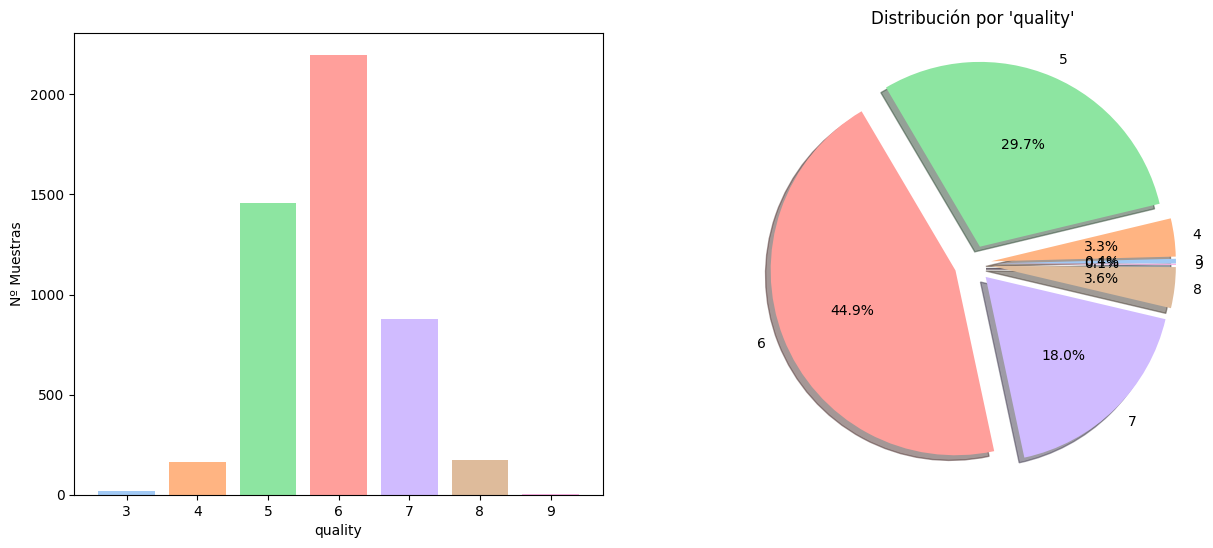

In [ ]:
##########
# PASO 1 #
##########

# Visualización de registros de cada categoría
samples = df['quality'].value_counts().sort_index()
porc = df['quality'].value_counts(normalize=True).sort_index()

fig, ax = plt.subplots(ncols=2, figsize=(15,6))
palette = sns.color_palette("pastel", len(samples))
ax[0].bar(samples.index, samples.values, color=palette);
ax[0].set_xlabel('quality')
ax[0].set_ylabel('Nº Muestras')

ax[1].pie(porc, labels=porc.index, autopct='%1.1f%%', shadow = True, explode = 0.1*np.ones(len(porc)), colors=palette);
ax[1].set_title("Distribución por 'quality'");

## 2. Se eliminan aquellas filas que contengan valores NaN y null

In [ ]:
##########
# PASO 2 #
##########

#Comprobación de valores nan y null para cada característica
pd.merge(df.isnull().sum().to_frame(), df.isna().sum().to_frame(), left_index=True, right_index=True, suffixes=('Nº_Null', 'Nº_Nan'))

0Nº_Null  0Nº_Nan
fixed acidity                0        0
volatile acidity             0        0
citric acid                  0        0
residual sugar               0        0
chlorides                    0        0
free sulfur dioxide          0        0
total sulfur dioxide         0        0
density                      0        0
pH                           0        0
sulphates                    0        0
alcohol                      0        0
quality                      0        0

In [ ]:
#Registros con valores NaN
(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [ ]:
#Registros con valores null
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

Se ha comprobado que no hay valores con Nan ni null, por lo que no se eliminarán filas

In [ ]:
# Eliminación de filas con valores NaN y reajuste de los indices
rows_before = df[target_field].value_counts()
df.dropna(inplace=True)
df.index = range(df.shape[0])
rows_after = df[target_field].value_counts()

# Visualización de registros de cada categoría
display(pd.DataFrame(pd.concat([rows_before, rows_after], axis=1, keys=["before", "after"])))
print(f"\n{rows_before.sum() - df.shape[0]} rows deleted\n")

before  after
6    2198   2198
5    1457   1457
7     880    880
8     175    175
4     163    163
3      20     20
9       5      5


0 rows deleted



## Pasos 3-5.
## 3. Se eliminan las columnas seleccionadas
## 4. Se transforman (a valores categóricos) o eliminan las columnas no numéricas
## 5. Se escalan las columnas seleccionadas

In [ ]:
##########
# PASO 3 #
##########

# Se eliminan las columnas seleccionadas
for column in columns_to_discard:
  del df[column]

##########
# PASO 4 #
##########

# Se transforman las variables no numéricas a categóricas
if all_columns_to_categorical:
  for column in df.columns:
    # Revisa el campo a predecir de forma individual
    if column == target_field and not target_field_to_categorical:
      continue
    # Comprueba las columna no numéricas para pasarlo a valores categóricos
    if not (pd.api.types.is_numeric_dtype(df[column].dtype)):
      types = df[column].unique()
      df[column].replace(types, range(len(types)), inplace=True);
# Se eliminan las variables no numéricas
else:
  for column in df.columns:
    # Revisa el campo a predecir de forma individual
    if column == target_field:
      continue
    # Elimina las columnas
    if not (pd.api.types.is_numeric_dtype(df[column].dtype)):
      del df[column]

##########
# PASO 5 #
##########

# Se escalan los datos de las columnas seleccionadas
if columns_to_minmax_scale:
  scaler = MinMaxScaler()
  df[columns_to_minmax_scale] = scaler.fit_transform(df[columns_to_minmax_scale])
if columns_to_standard_scale:
  scaler = StandardScaler()
  df[columns_to_standard_scale] = scaler.fit_transform(df[columns_to_standard_scale])

# Visualización de un registro de cada categoría antes y después
display(data.drop_duplicates(target_field, keep='first'))
print(f"{data.shape[0]} rows x {data.shape[1]} columns")

display(df.drop_duplicates(target_field, keep='first'))
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.0              0.27         0.36           20.70      0.045   
10             8.1              0.27         0.41            1.45      0.033   
13             6.6              0.16         0.40            1.50      0.044   
17             6.2              0.66         0.48            1.20      0.029   
46             6.2              0.45         0.26            4.40      0.063   
251            8.5              0.26         0.21           16.20      0.074   
774            9.1              0.27         0.45           10.60      0.035   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   45.0                 170.0   1.0010  3.00       0.45   
10                  11.0                  63.0   0.9908  2.99       0.56   
13                  48.0                 143.0   0.9912  3.54       0.52   
17                  29.0                  75.0   0.9892  3.33       0.39   
46                  63.0                 206.0   0.9940  3.27       0.52   
251                 41.0                 197.0   0.9980  3.02       0.50   
774                 28.0                 124.0   0.9970  3.20       0.46   

     alcohol  quality  
0        8.8        6  
10      12.0        5  
13      12.4        7  
17      12.8        8  
46       9.8        4  
251      9.8        3  
774     10.4        9

4898 rows x 12 columns


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.0              0.27         0.36           20.70      0.045   
10             8.1              0.27         0.41            1.45      0.033   
13             6.6              0.16         0.40            1.50      0.044   
17             6.2              0.66         0.48            1.20      0.029   
46             6.2              0.45         0.26            4.40      0.063   
251            8.5              0.26         0.21           16.20      0.074   
774            9.1              0.27         0.45           10.60      0.035   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   45.0                 170.0   1.0010  3.00       0.45   
10                  11.0                  63.0   0.9908  2.99       0.56   
13                  48.0                 143.0   0.9912  3.54       0.52   
17                  29.0                  75.0   0.9892  3.33       0.39   
46                  63.0                 206.0   0.9940  3.27       0.52   
251                 41.0                 197.0   0.9980  3.02       0.50   
774                 28.0                 124.0   0.9970  3.20       0.46   

     alcohol  quality  
0        8.8        6  
10      12.0        5  
13      12.4        7  
17      12.8        8  
46       9.8        4  
251      9.8        3  
774     10.4        9

4898 rows x 12 columns


# Visualización de la relación entre columnas


*   Matriz de correlación
*   Gráfico de dispersión
*   SelectKBest
*   Skewness/Kurtosis
*   Distribución KDE e Histograma
*   Gráfico de cajas
*   Árboles de decisión






## Matriz de Correlación

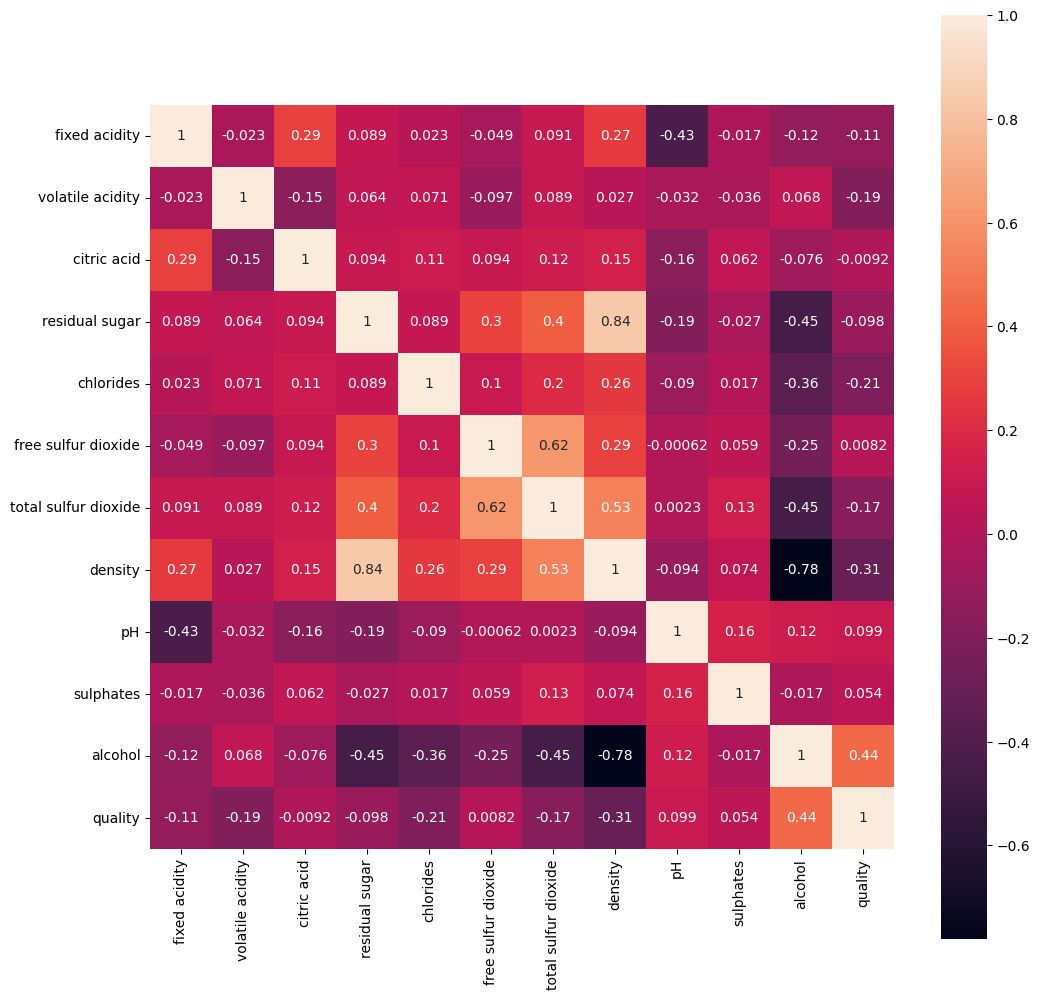

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), square=True, annot=True, ax=ax);

Ranking de correlación del target con el resto de variables aplicando valor absoluto.

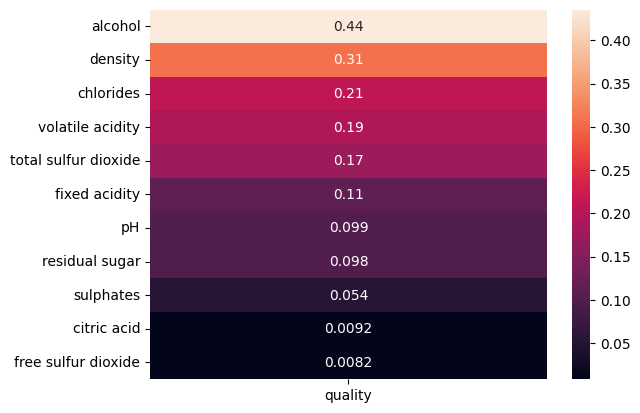

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(df.corr()[target_field].drop(target_field).abs().sort_values(ascending=False).to_frame(), annot=True, ax=ax);

Correlaciones altas entre variables

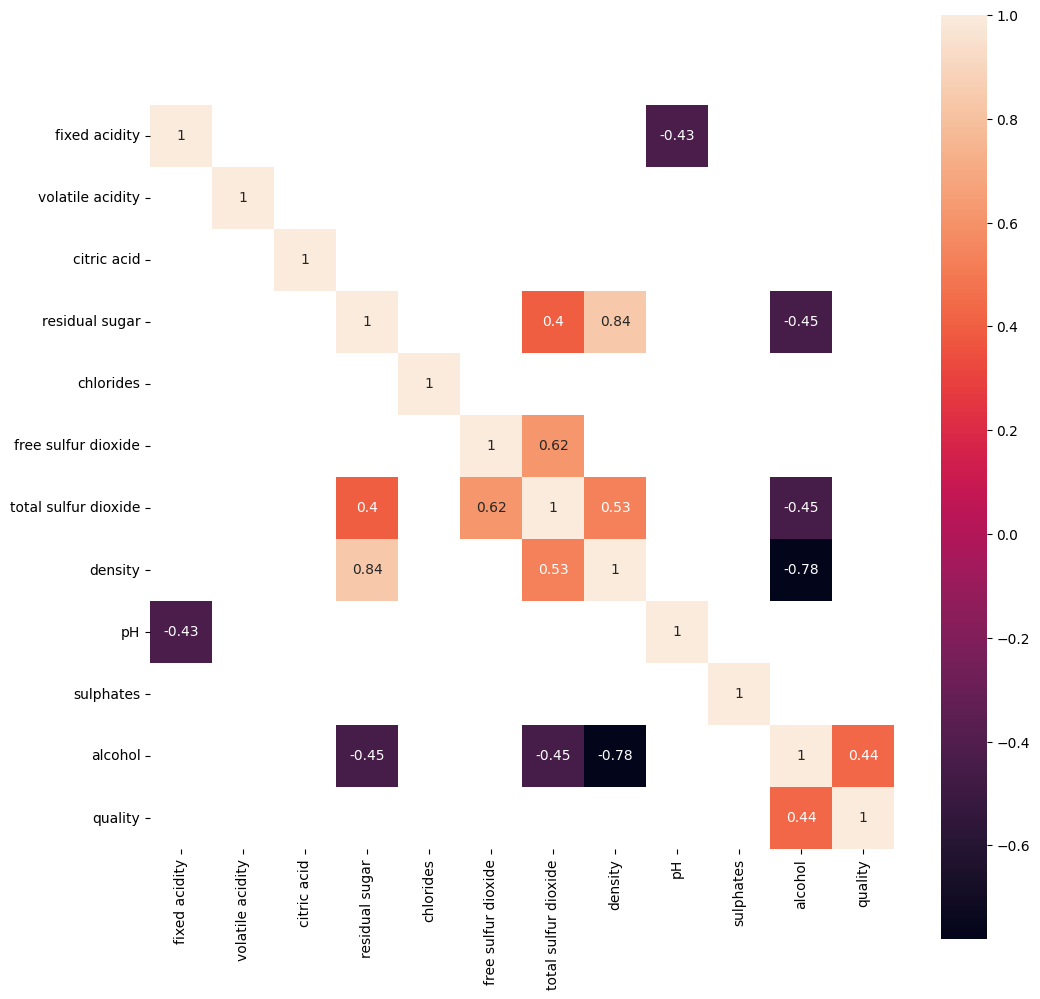

In [ ]:
min_corr = 0.4

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr()[df.corr().abs() > min_corr], square=True, annot=True, ax=ax);

## Gráfico de dispersión

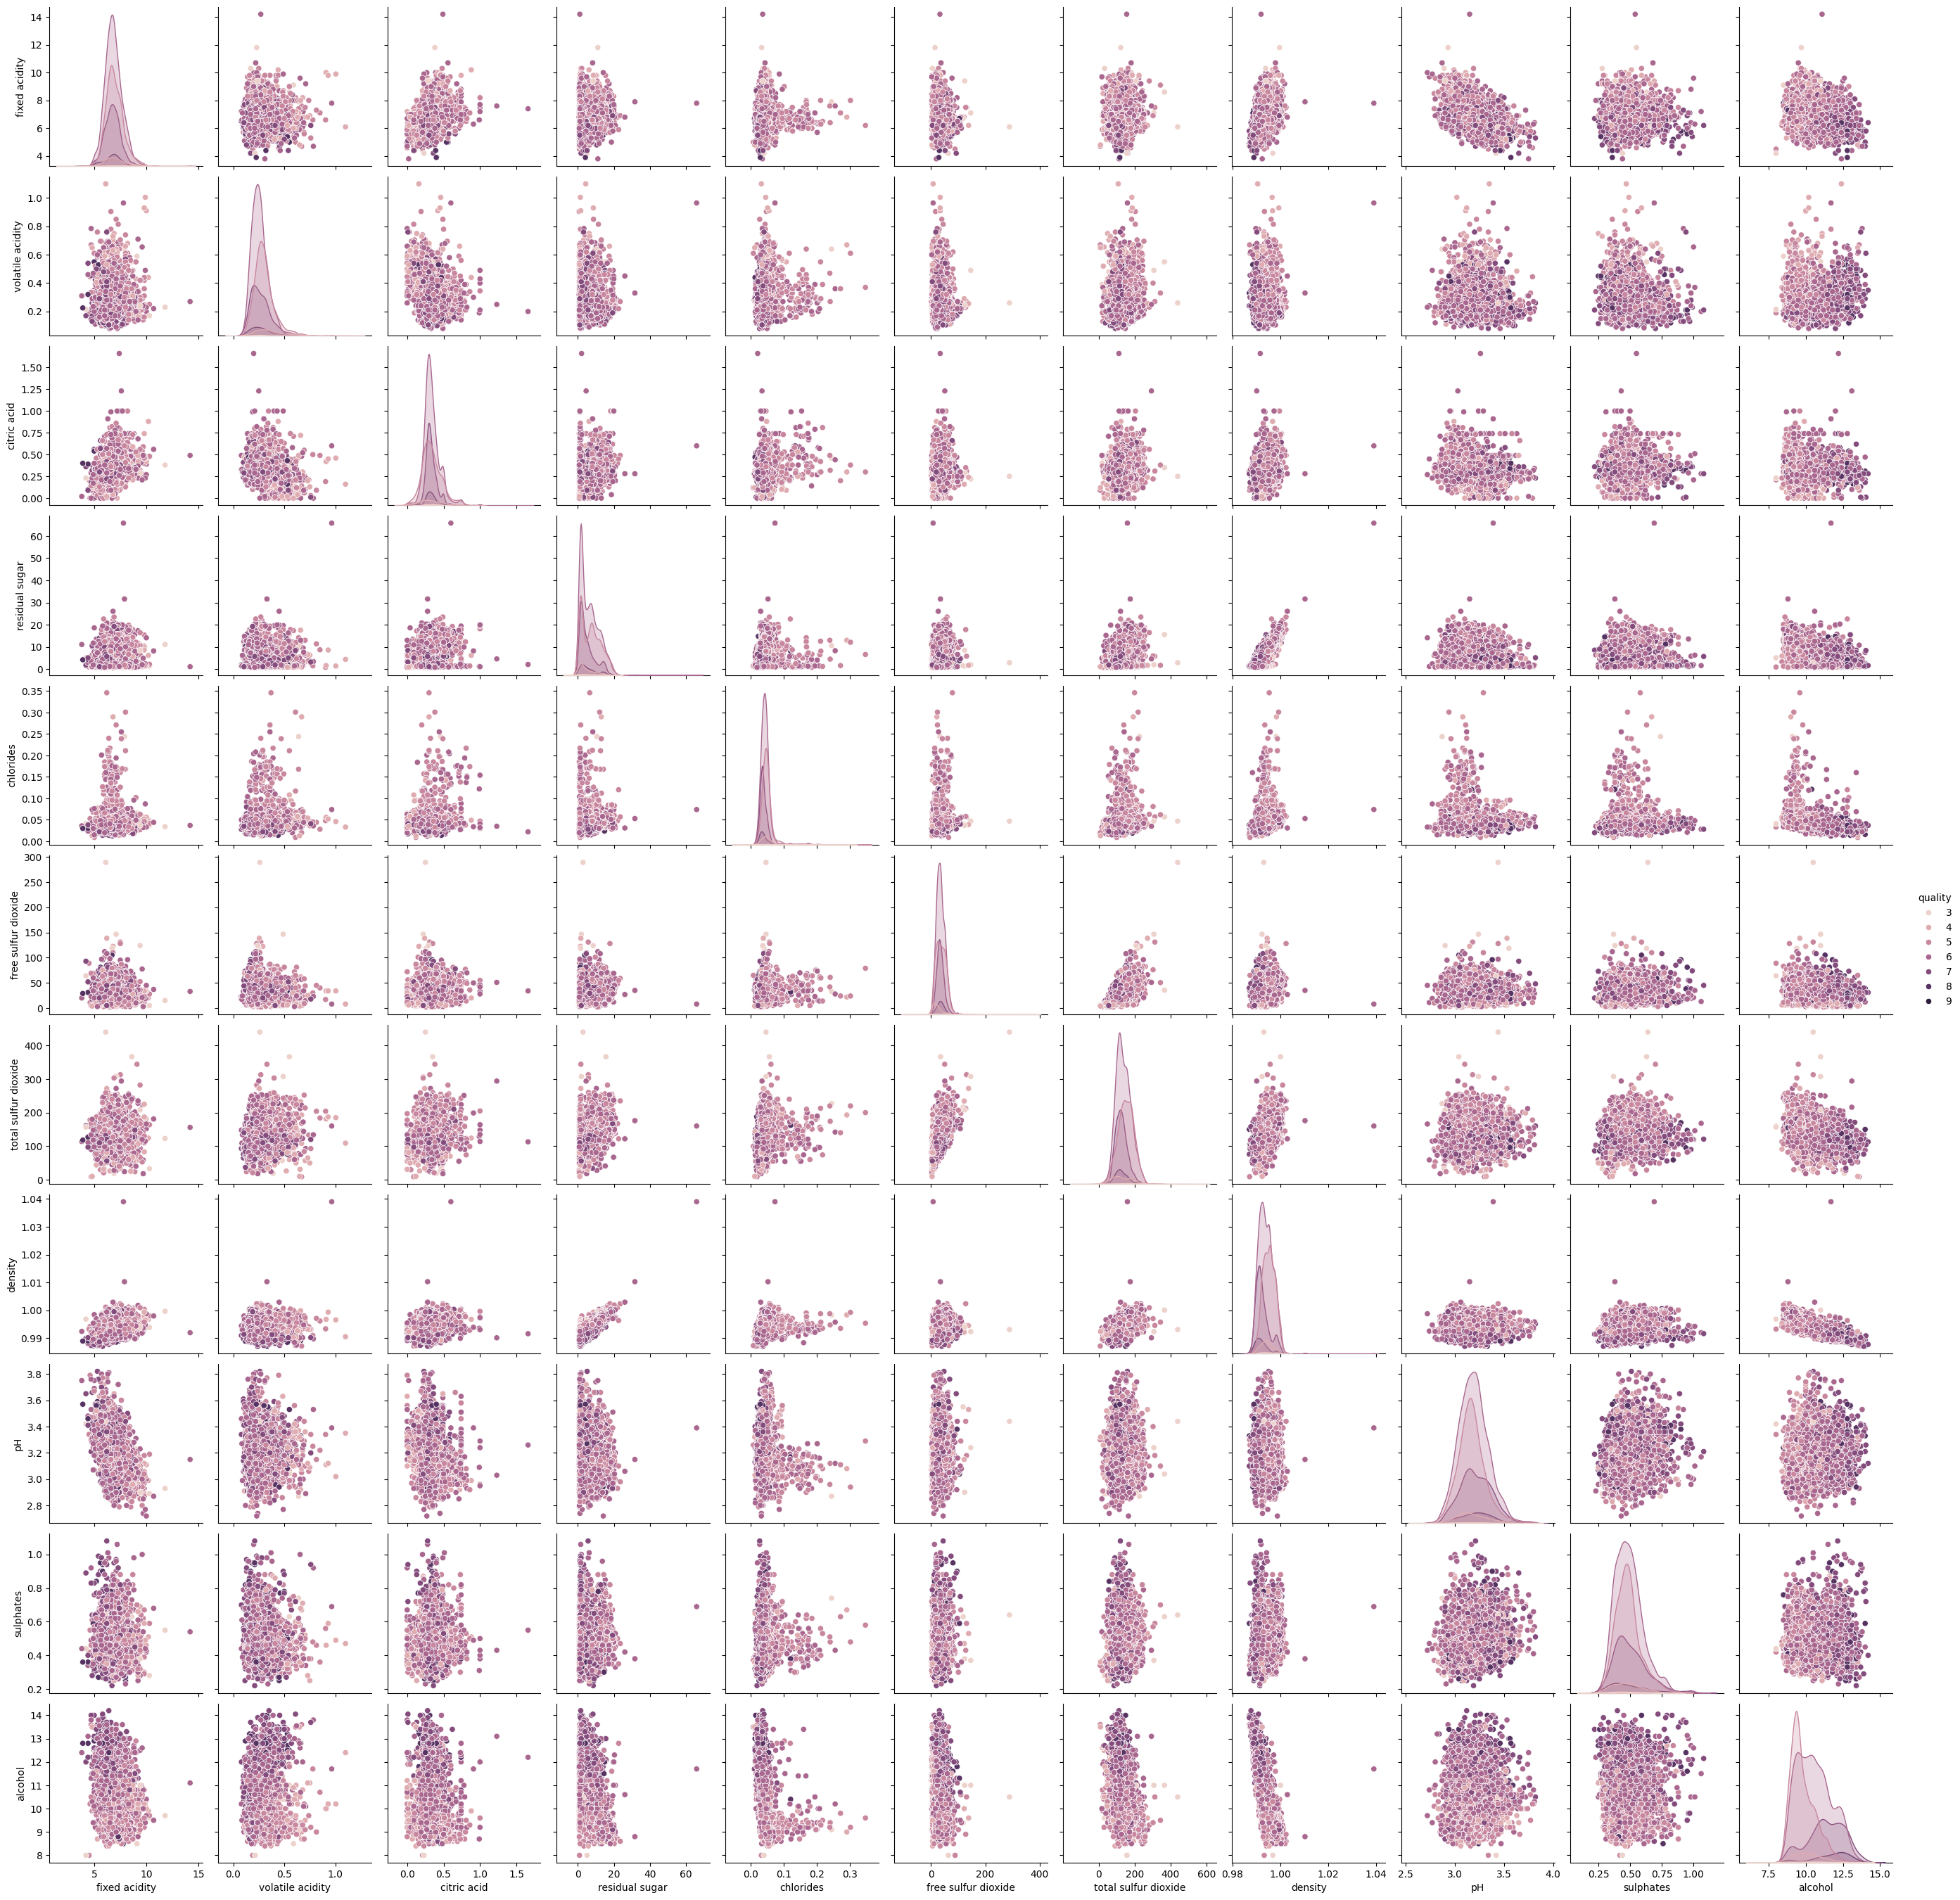

In [ ]:
# Gráfico de dispersión que muestra la relación entre las variables numéricas.
sns.pairplot(df, hue=target_field)

El pairplot es un caso particular de PairGrid cuya diagonal muestra la distribución de cada variable y el resto de rejillas muestra el gráfico de dispersión de cada pareja de variables.

Sin embargo, podemos definir el PairGrid para que muestre otras gráficas, por ejemplo, el histograma en la diagonal y la gráfica KDE de cada pareja de variables en la parte superior, dejando la gráfica de dispersión en la inferior.

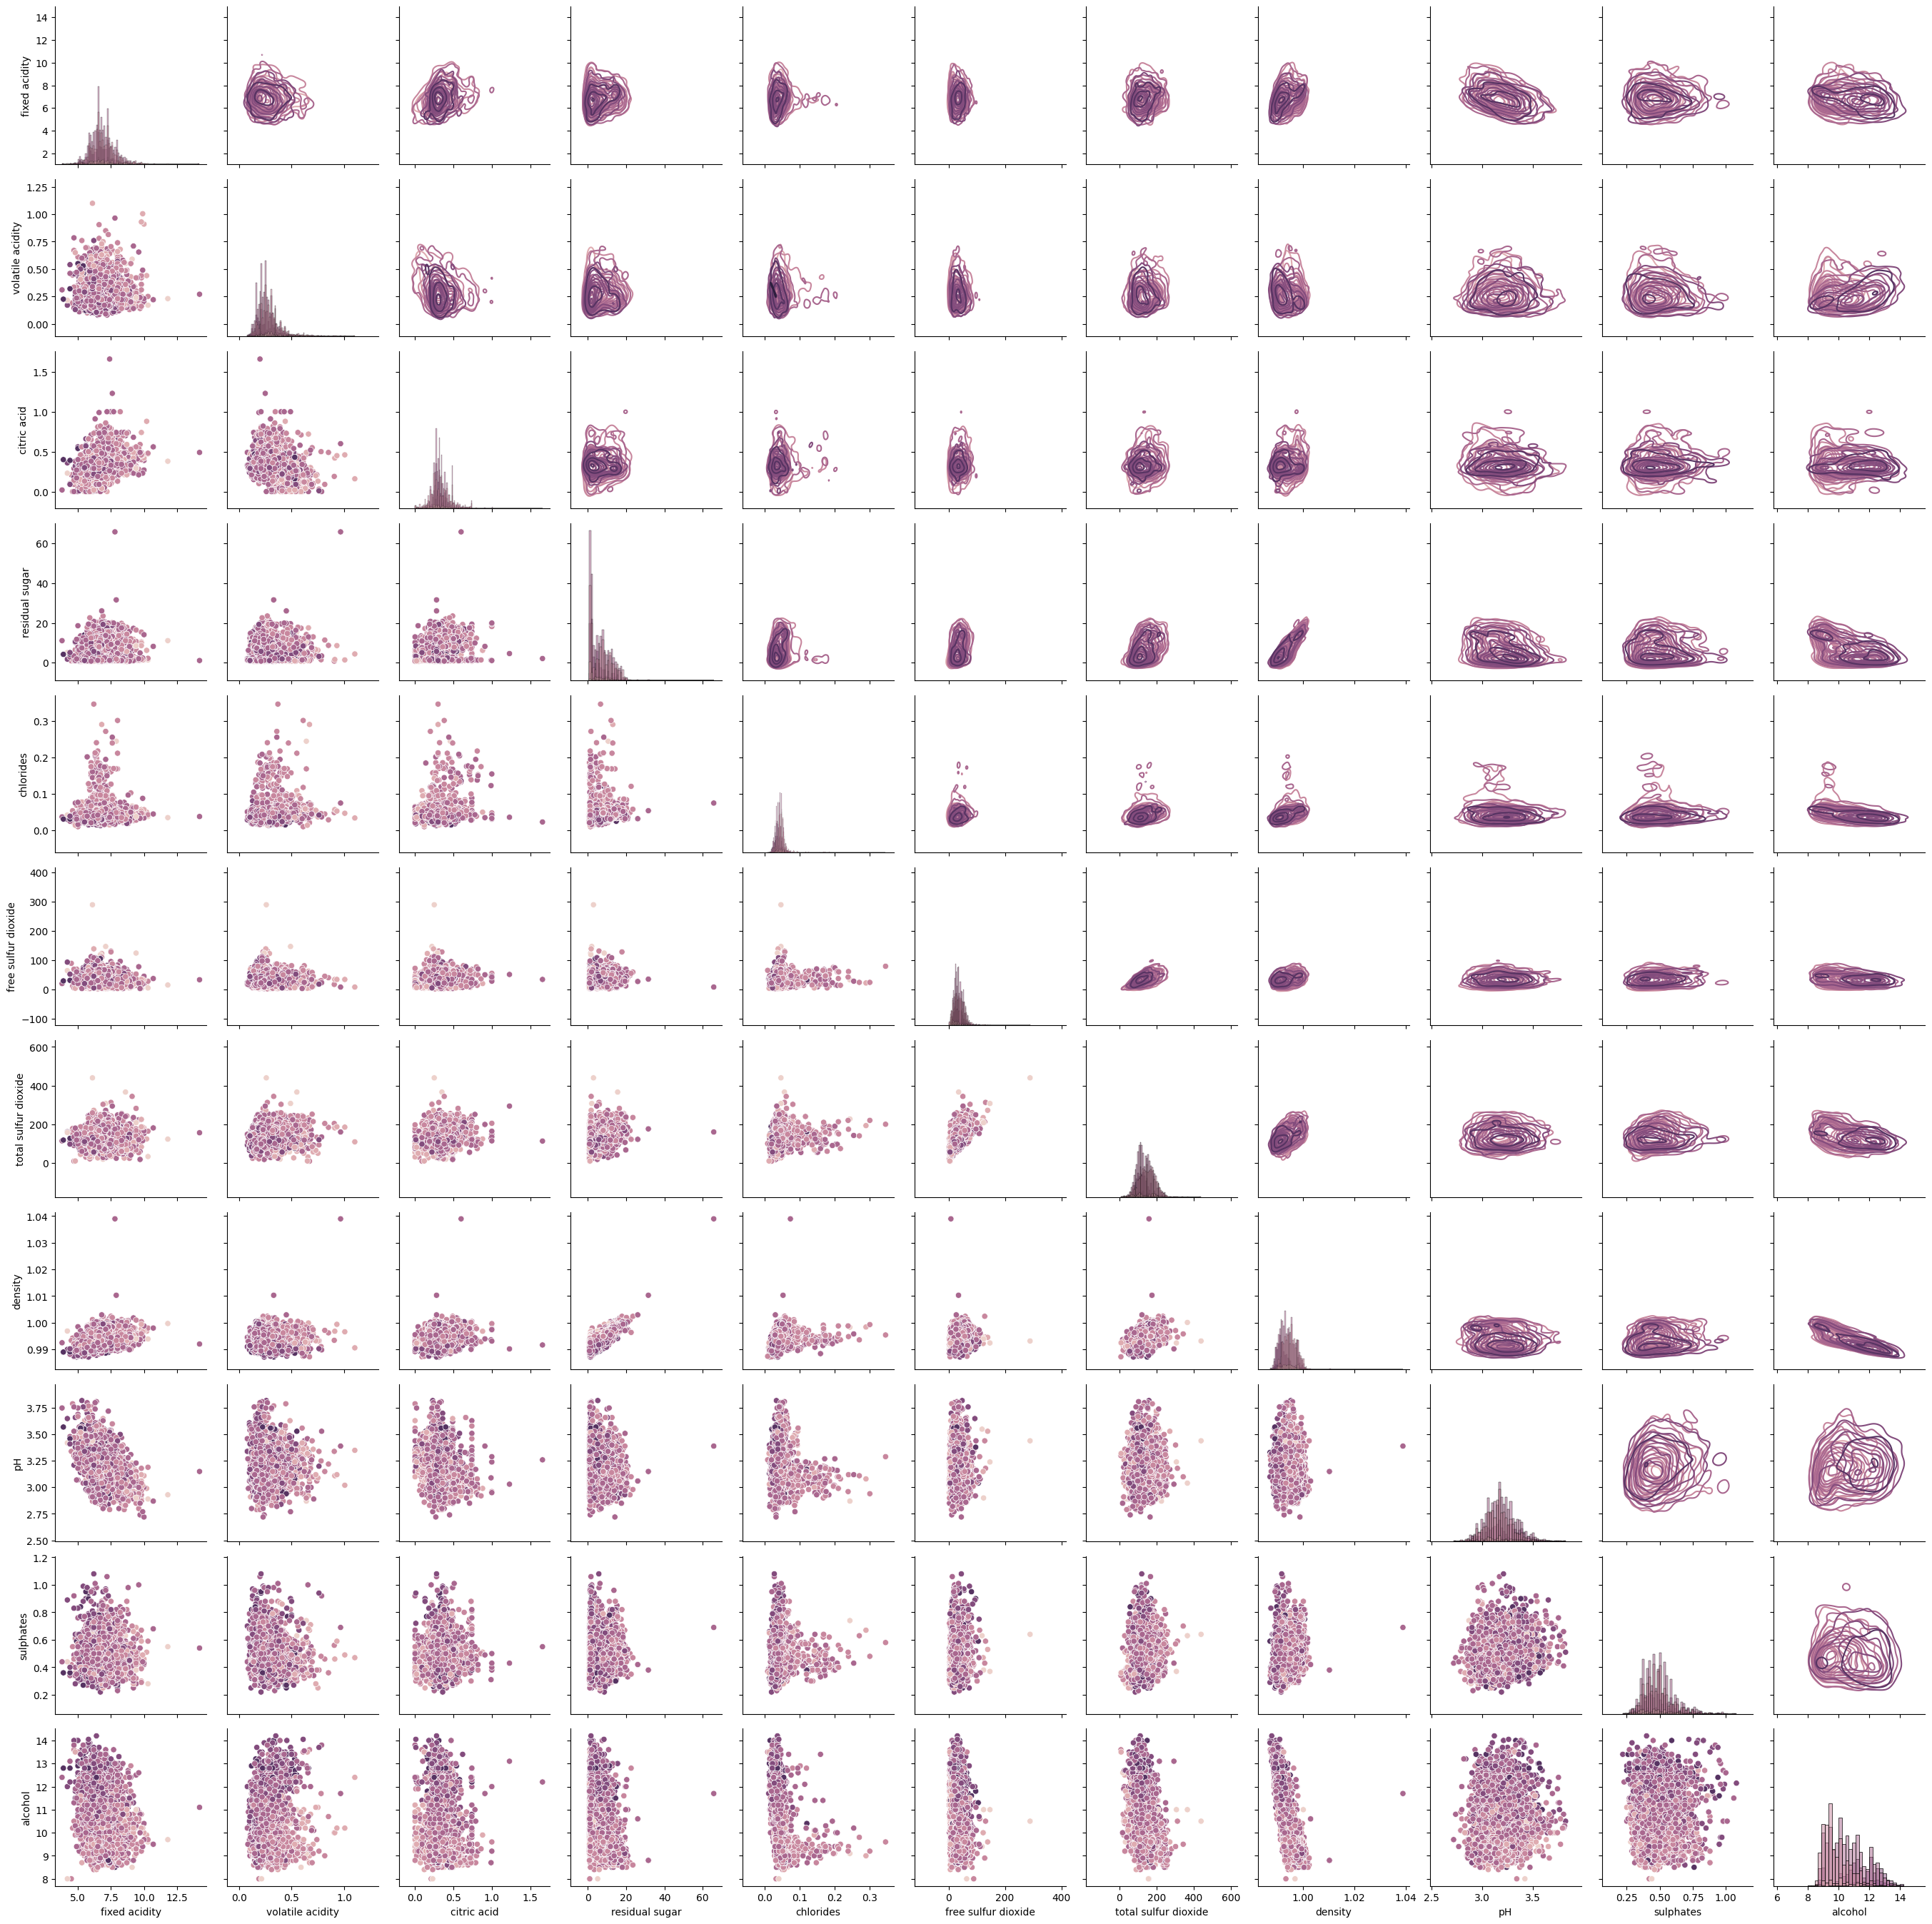

In [ ]:
g = sns.PairGrid(df, hue=target_field)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

## SelectKBest

La función usado por defecto es el test ANOVA F-value para tareas de clasificación y el test F-value de regresión lineal

In [ ]:
# Crear el objeto SelectKBest con la función de prueba chi-cuadrado
k_best = SelectKBest(k='all')

# Aplicar la transformación a tus datos
k_best.fit_transform(df.drop(target_field, axis=1), df[target_field])

# Obtener las puntuaciones de las características y los índices de las características seleccionadas
feature_scores = pd.DataFrame({'Feature': df.drop(target_field, axis=1).columns, 'Score': k_best.scores_})

# Ordenar las características por puntuación en orden descendente
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Obtener los índices de las características seleccionadas después de la ordenación
selected_features_indices = k_best.get_support(indices=True)

# Imprimir las puntuaciones y las características seleccionadas
print("Puntuaciones de características:")
print(feature_scores)

Puntuaciones de características:
                 Feature       Score
10               alcohol  229.734772
7                density  105.856434
1       volatile acidity   61.916739
6   total sulfur dioxide   45.200949
4              chlorides   42.472252
3         residual sugar   21.270285
5    free sulfur dioxide   19.723674
0          fixed acidity   12.894792
8                     pH   10.103289
9              sulphates    3.642317
2            citric acid    3.245745


Usar la función Chi2 no es apropiado para este tipo de problema con datos conitnuos y sin normalizar. Es más recomendable que se use con problemas con datos categóricos.

In [ ]:
# Crear el objeto SelectKBest con la función de prueba chi-cuadrado
k_best = SelectKBest(score_func=chi2, k='all')

# Aplicar la transformación a tus datos
k_best.fit_transform(df.drop(target_field, axis=1), df[target_field])

# Obtener las puntuaciones de las características y los índices de las características seleccionadas
feature_scores = pd.DataFrame({'Feature': df.drop(target_field, axis=1).columns, 'Score': k_best.scores_})

# Ordenar las características por puntuación en orden descendente
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Obtener los índices de las características seleccionadas después de la ordenación
selected_features_indices = k_best.get_support(indices=True)

# Imprimir las puntuaciones y las características seleccionadas
print("Puntuaciones de características:")
print(feature_scores)

Puntuaciones de características:
                 Feature        Score
6   total sulfur dioxide  3358.298433
5    free sulfur dioxide   947.712845
3         residual sugar   501.235224
10               alcohol   155.078234
1       volatile acidity    12.622636
0          fixed acidity     7.922042
4              chlorides     2.529005
2            citric acid     0.851118
9              sulphates     0.579206
8                     pH     0.428745
7                density     0.005065


## Skewness Kurtosis

El skewness es una medida de simetría y por tanto si el dataset es simétrico con una distribución normal este valor tiende a ser 0.
La kurtosis por su parte es una medida de las colas de la distribución. Cuanto mayor peso tengan las colas, mayor es su valor y por tanto una distribución normal tiende a tener este valor a 0.

In [ ]:
print(f"{'Columna':20} | {'Skewness':8} | {'Kurtosis':10}")
print("-------------------------------------------")
for column in df.drop([target_field],axis=1).columns:
    print(f"{column:<20} |  {df[column].skew():7.2} |  {df[column].kurt():7.3} ")

Columna              | Skewness | Kurtosis  
-------------------------------------------
fixed acidity        |     0.65 |     2.17 
volatile acidity     |      1.6 |     5.09 
citric acid          |      1.3 |     6.17 
residual sugar       |      1.1 |     3.47 
chlorides            |      5.0 |     37.6 
free sulfur dioxide  |      1.4 |     11.5 
total sulfur dioxide |     0.39 |    0.572 
density              |     0.98 |     9.79 
pH                   |     0.46 |    0.531 
sulphates            |     0.98 |     1.59 
alcohol              |     0.49 |   -0.698 


## Distribución KDE e Histograma

El gráfico KDE muestra la distribución de densidad de cada variable. Superponiendo el gráfico KDE de las distinas categorías podemos buscar aquellas variables donde los picos no estén alineados.

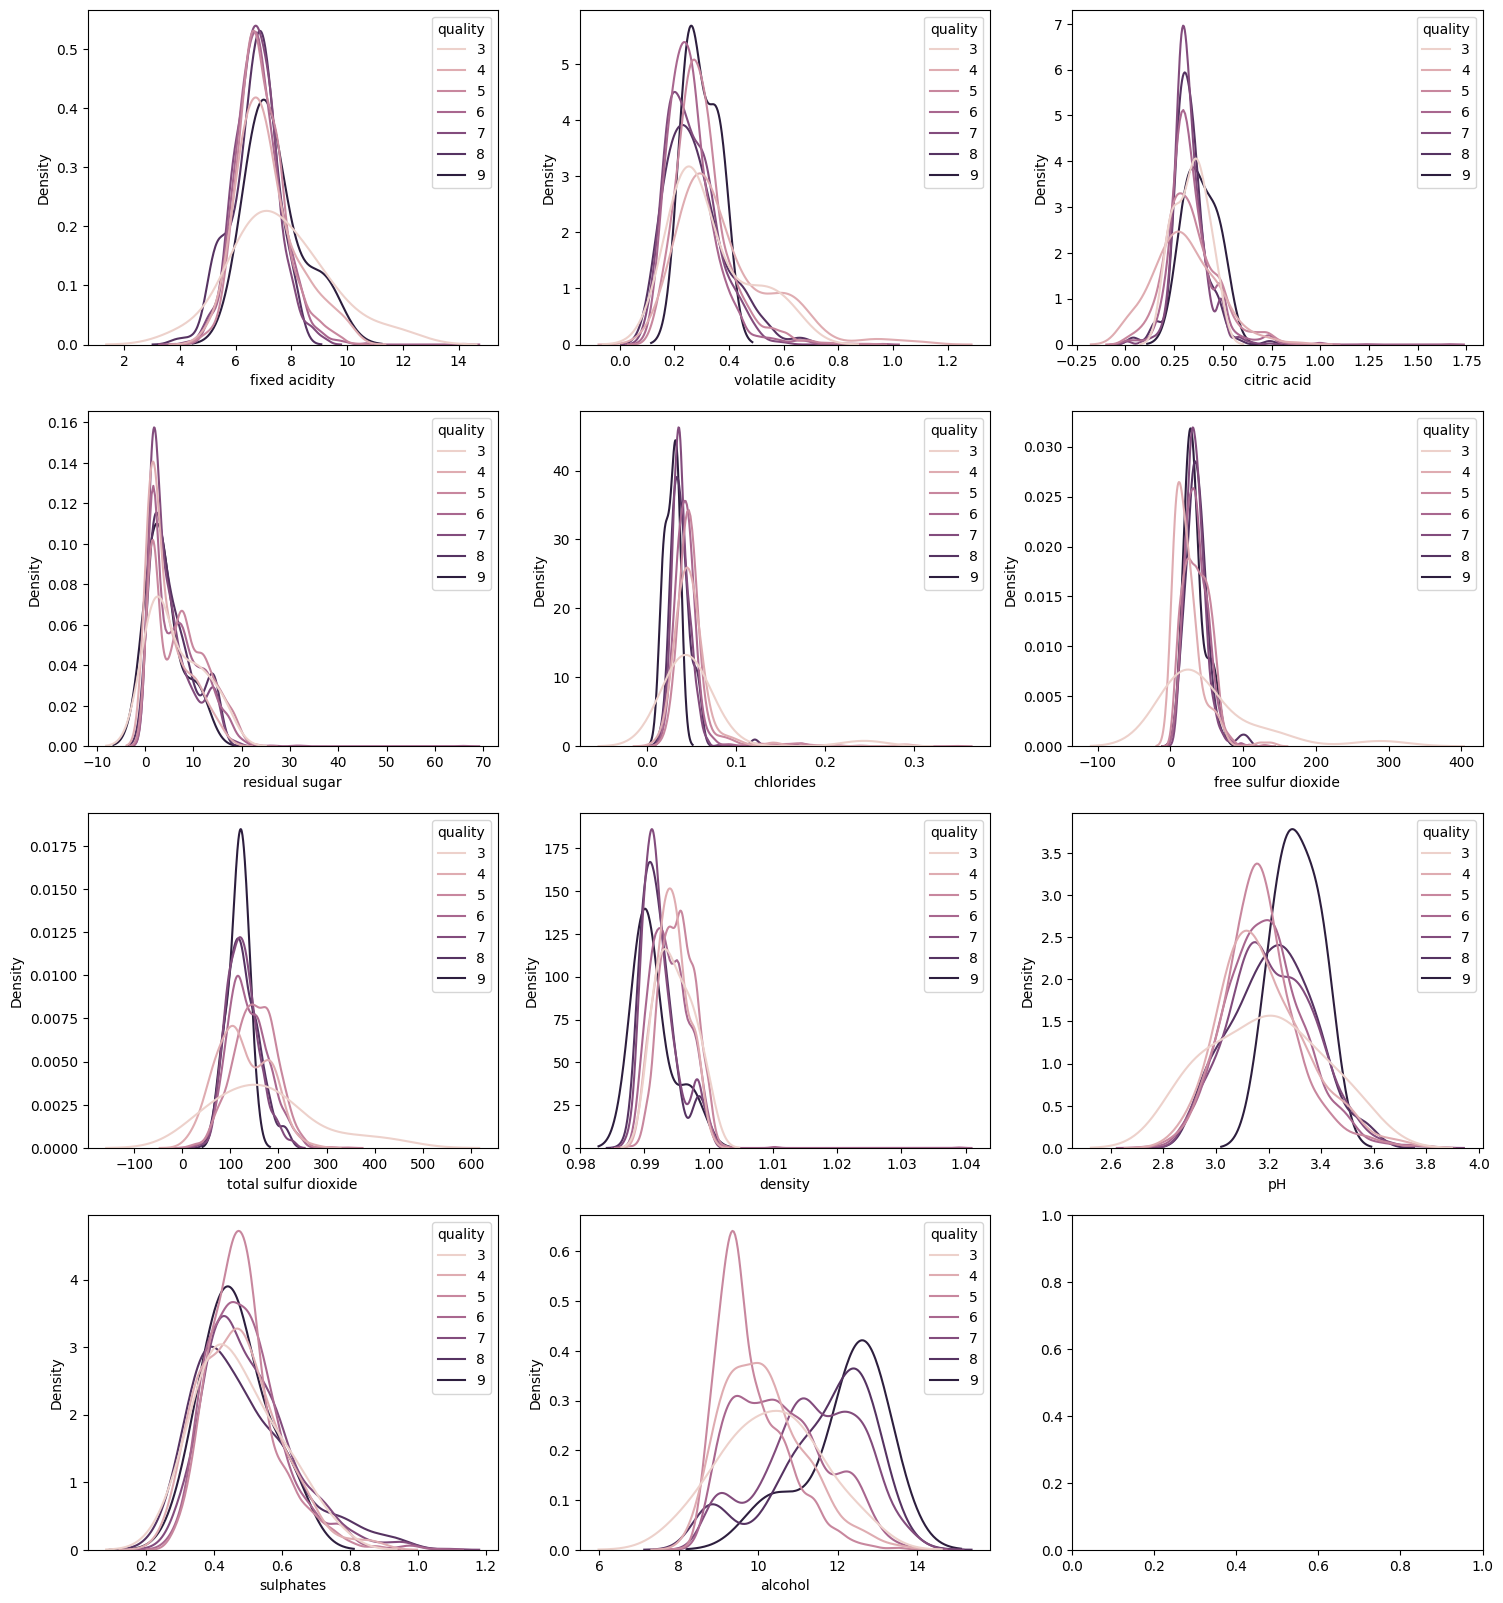

In [ ]:
# Gráfico de distribución kde de cada caldiad por cada variable dependiente
cols = df.columns

ncols = 3
fig, ax = plt.subplots(nrows=int(np.floor(len(cols)/ncols)), ncols = ncols, figsize = (6*ncols, np.floor(len(cols)/ncols)*5))

i,j = 0,0
for c in cols:
  if c != target_field:
    sns.kdeplot(df, x=c, hue=target_field, common_norm=False, fill=False, ax=ax[i, j], legend=True)

    j+=1
    if j==ncols:
        i+=1
        j=0

plt.show();

El histograma nos da información parecida pero es más complicado de representar si hay demasiadas variables. El KDE puede mostrarse junto al histograma.

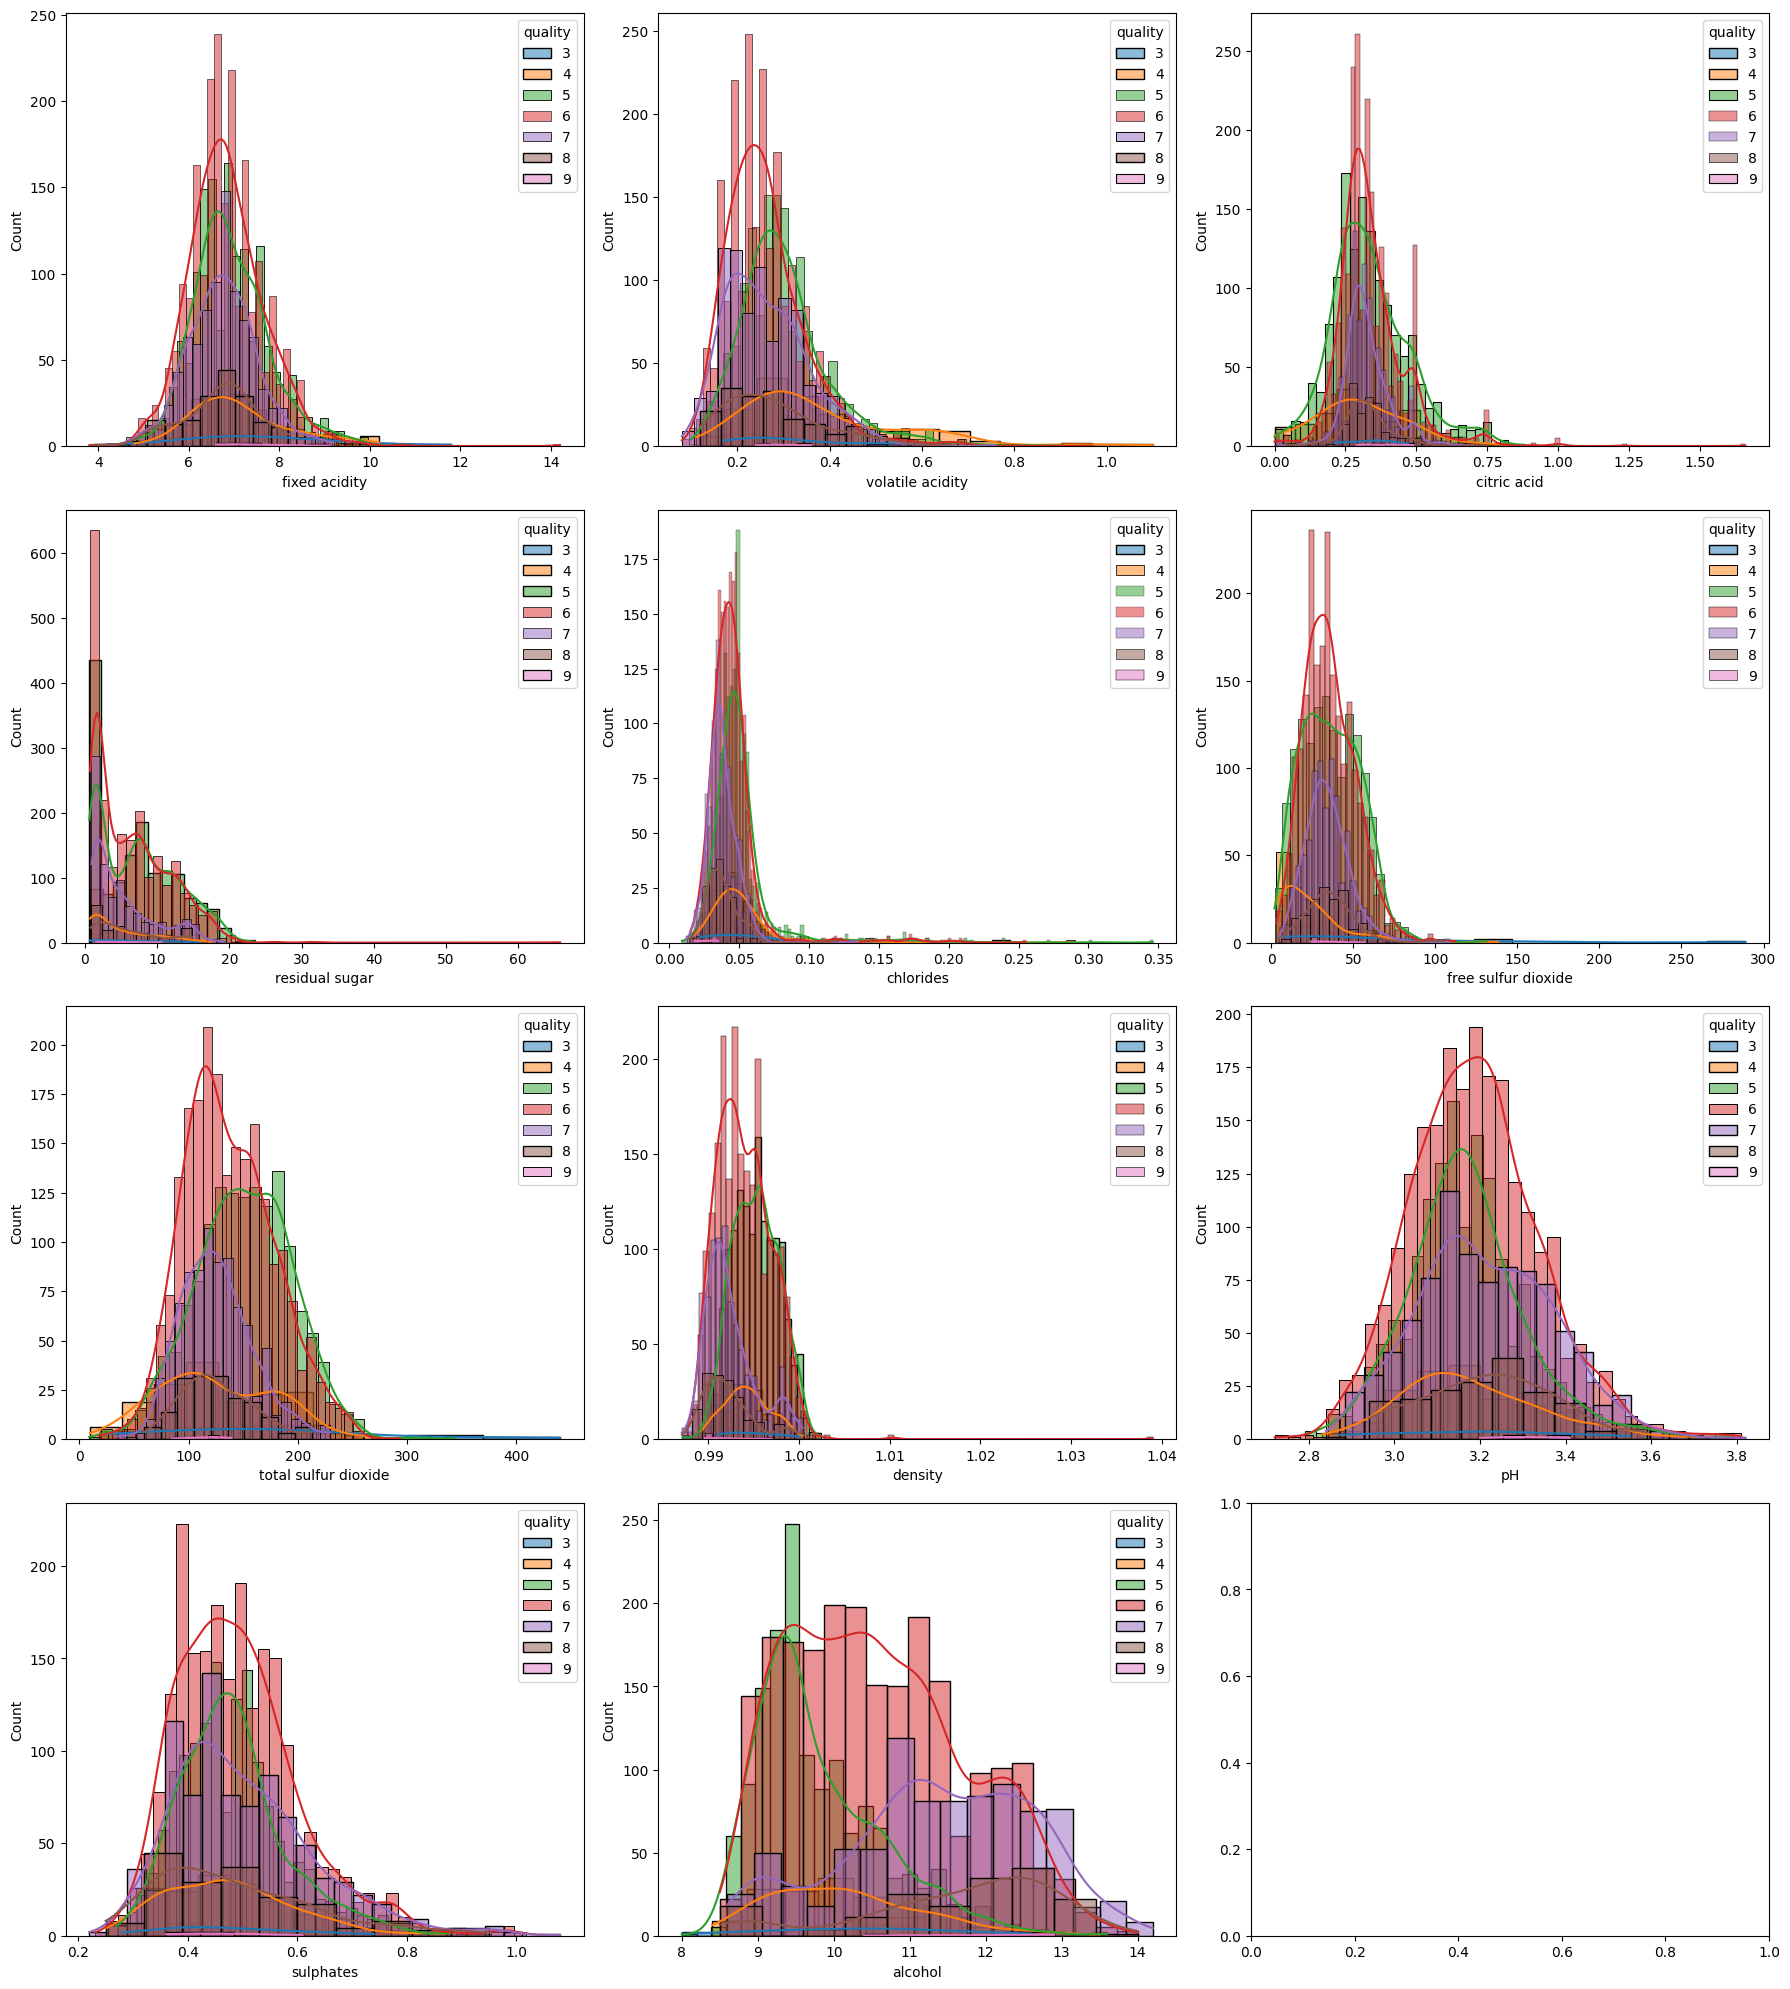

In [ ]:
# Historgrama y kde de cada calidad por cada variable dependiente
cols = df.columns

ncols = 3
fig, ax = plt.subplots(nrows=int(np.floor(len(cols)/ncols)), ncols = ncols, figsize = (6*ncols, np.floor(len(cols)/ncols)*5))

i,j = 0,0
for c in cols:
  if c != target_field:
    #for q in df['quality'].unique():
    for q in np.sort(df['quality'].unique()):
      sns.histplot(df.query('quality == '+ str(q))[c], kde = True, ax = ax[i,j], label = q)

    #Se reordenan los valores de la leyenda de menor a mayor por la calidad.
    #handles, labels = ax[i,j].get_legend_handles_labels()
    #labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0])))
    #ax[i,j].legend(handles, labels, title='quality')

    ax[i,j].legend(title='quality')

    j+=1
    if j==ncols:
        i+=1
        j=0

plt.tight_layout();

## Gráfico de cajas

El gráfico de cajas nos muestra los valores entre el primer y el tercer cuartil, señalizando el valor de la mediana. Además nos muestra los outliers por medio de puntos.

Si observamos diferencias en las alturas de las cajas para las diferentes categorías, es probable que dicha variable sea una buena opción a seleccionar para entrenar el modelo de clasificación.

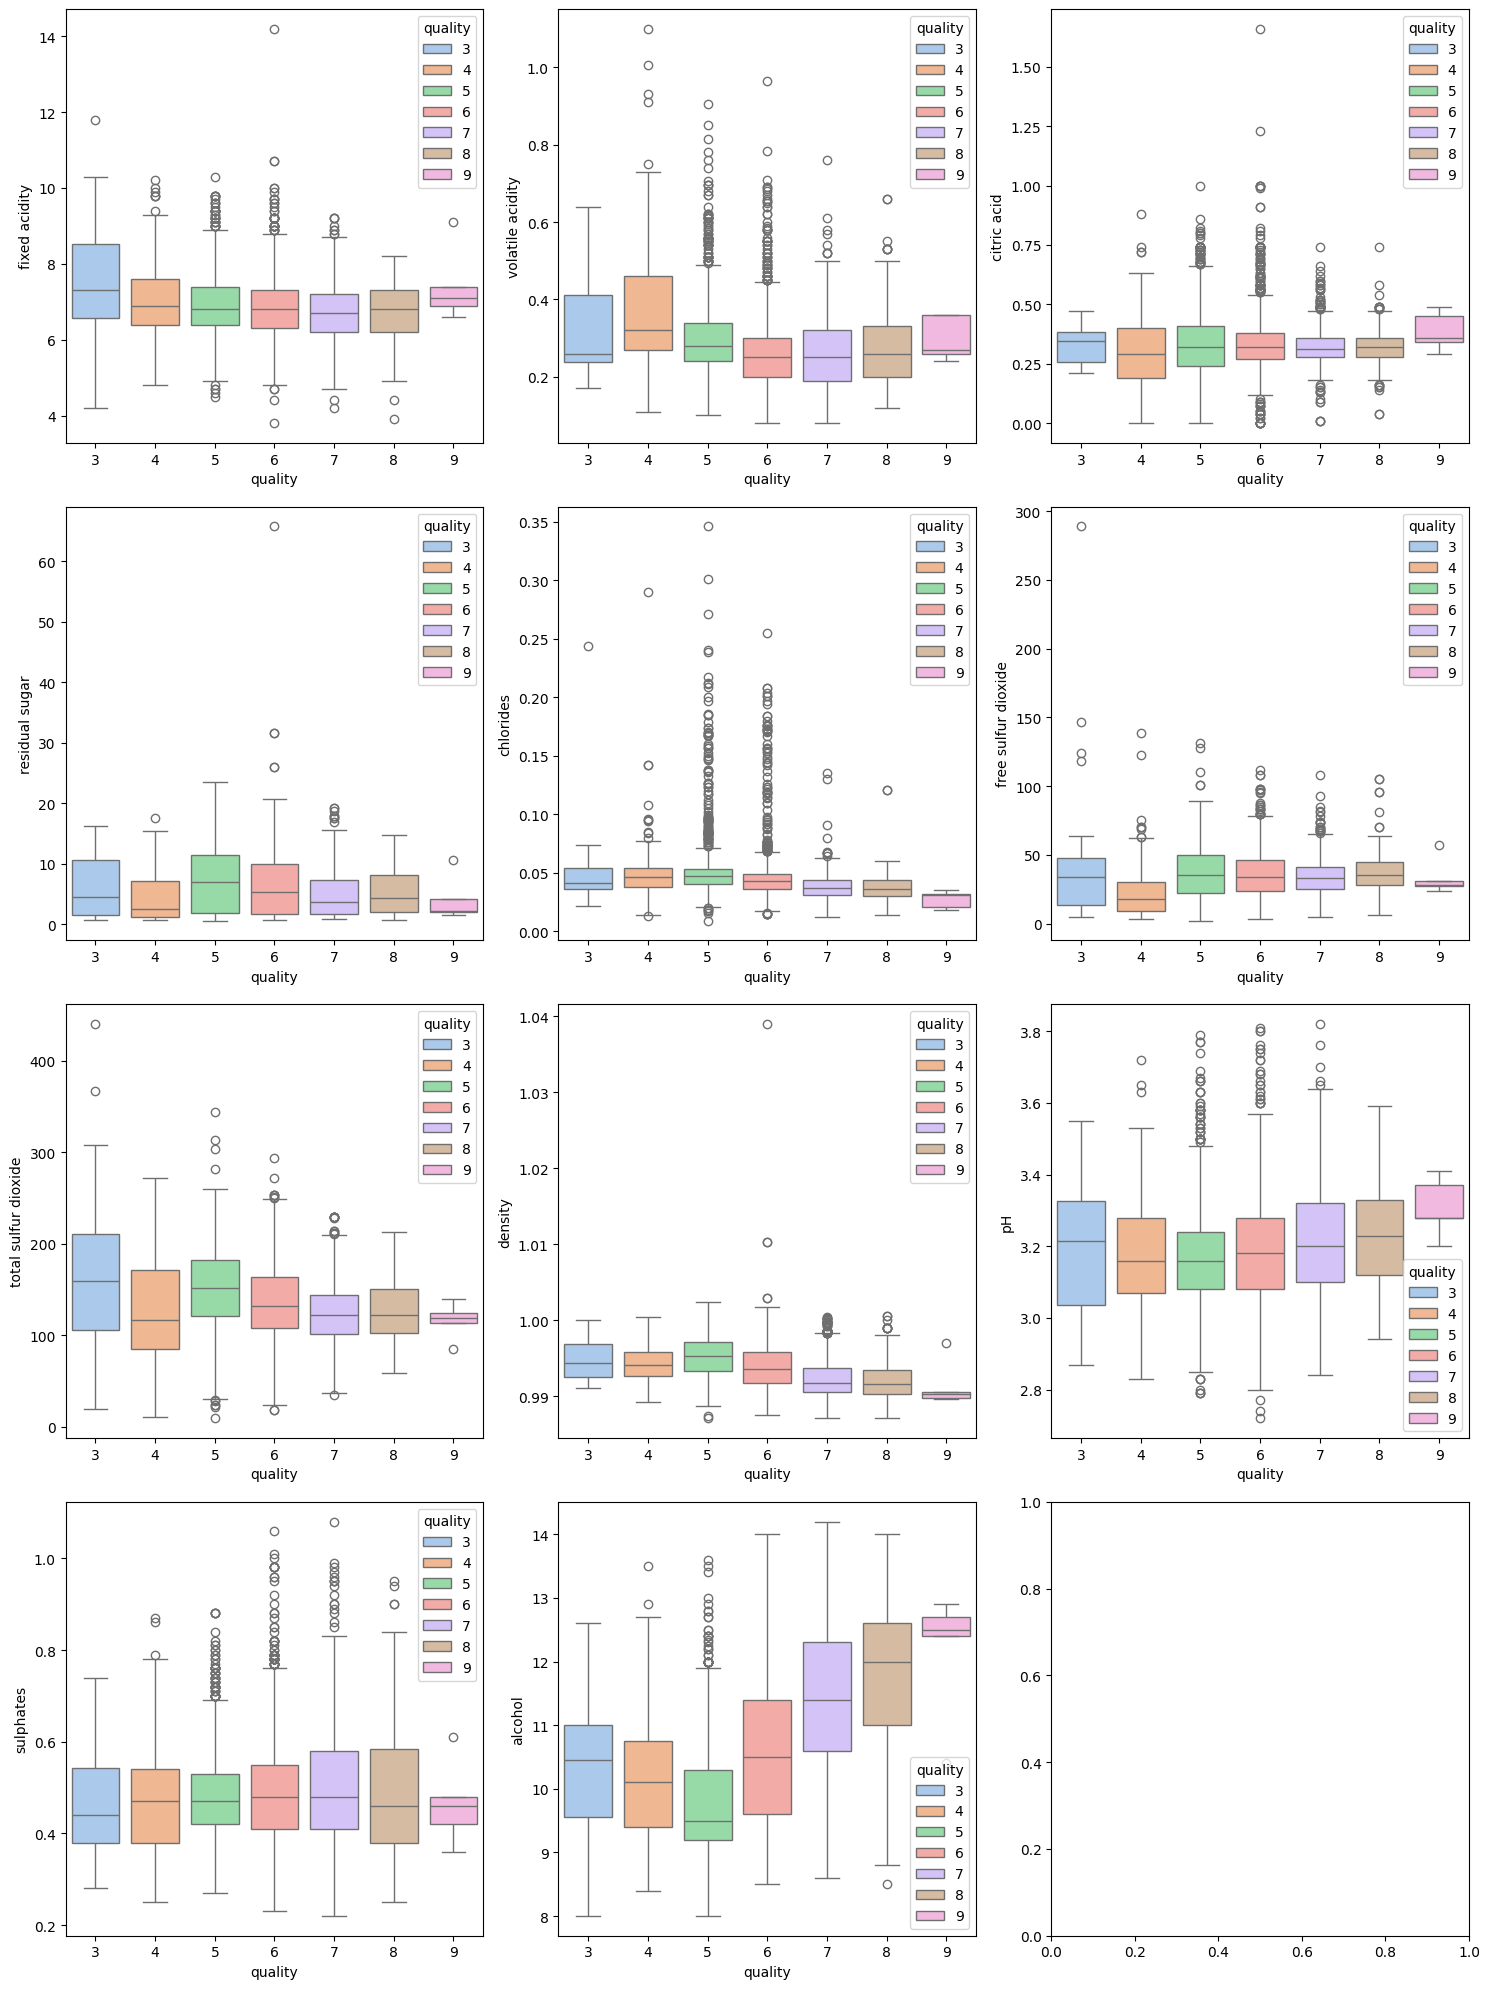

In [ ]:
# Gráfico de cajas de cada calidad por cada variable dependiente
cols = df.columns

ncols = 3
fig, ax = plt.subplots(nrows=int(np.floor(len(cols)/ncols)), ncols = ncols, figsize = (5*ncols, np.floor(len(cols)/ncols)*5))

i,j = 0,0
for c in cols:
  if c != target_field:
    sns.boxplot(x = target_field, y = c, hue = target_field, data = df, ax = ax[i,j], palette='pastel')

    j+=1
    if j==ncols:
        i+=1
        j=0

plt.tight_layout();

## Árboles de decisisón

Entrenar un modelo de árboles permite obtener las características más importantes según las divisiones que ha realizado. Podemos ordenar los resultados para conocer las características que mejores resultados nos darían si hacemos una selección de ellas.

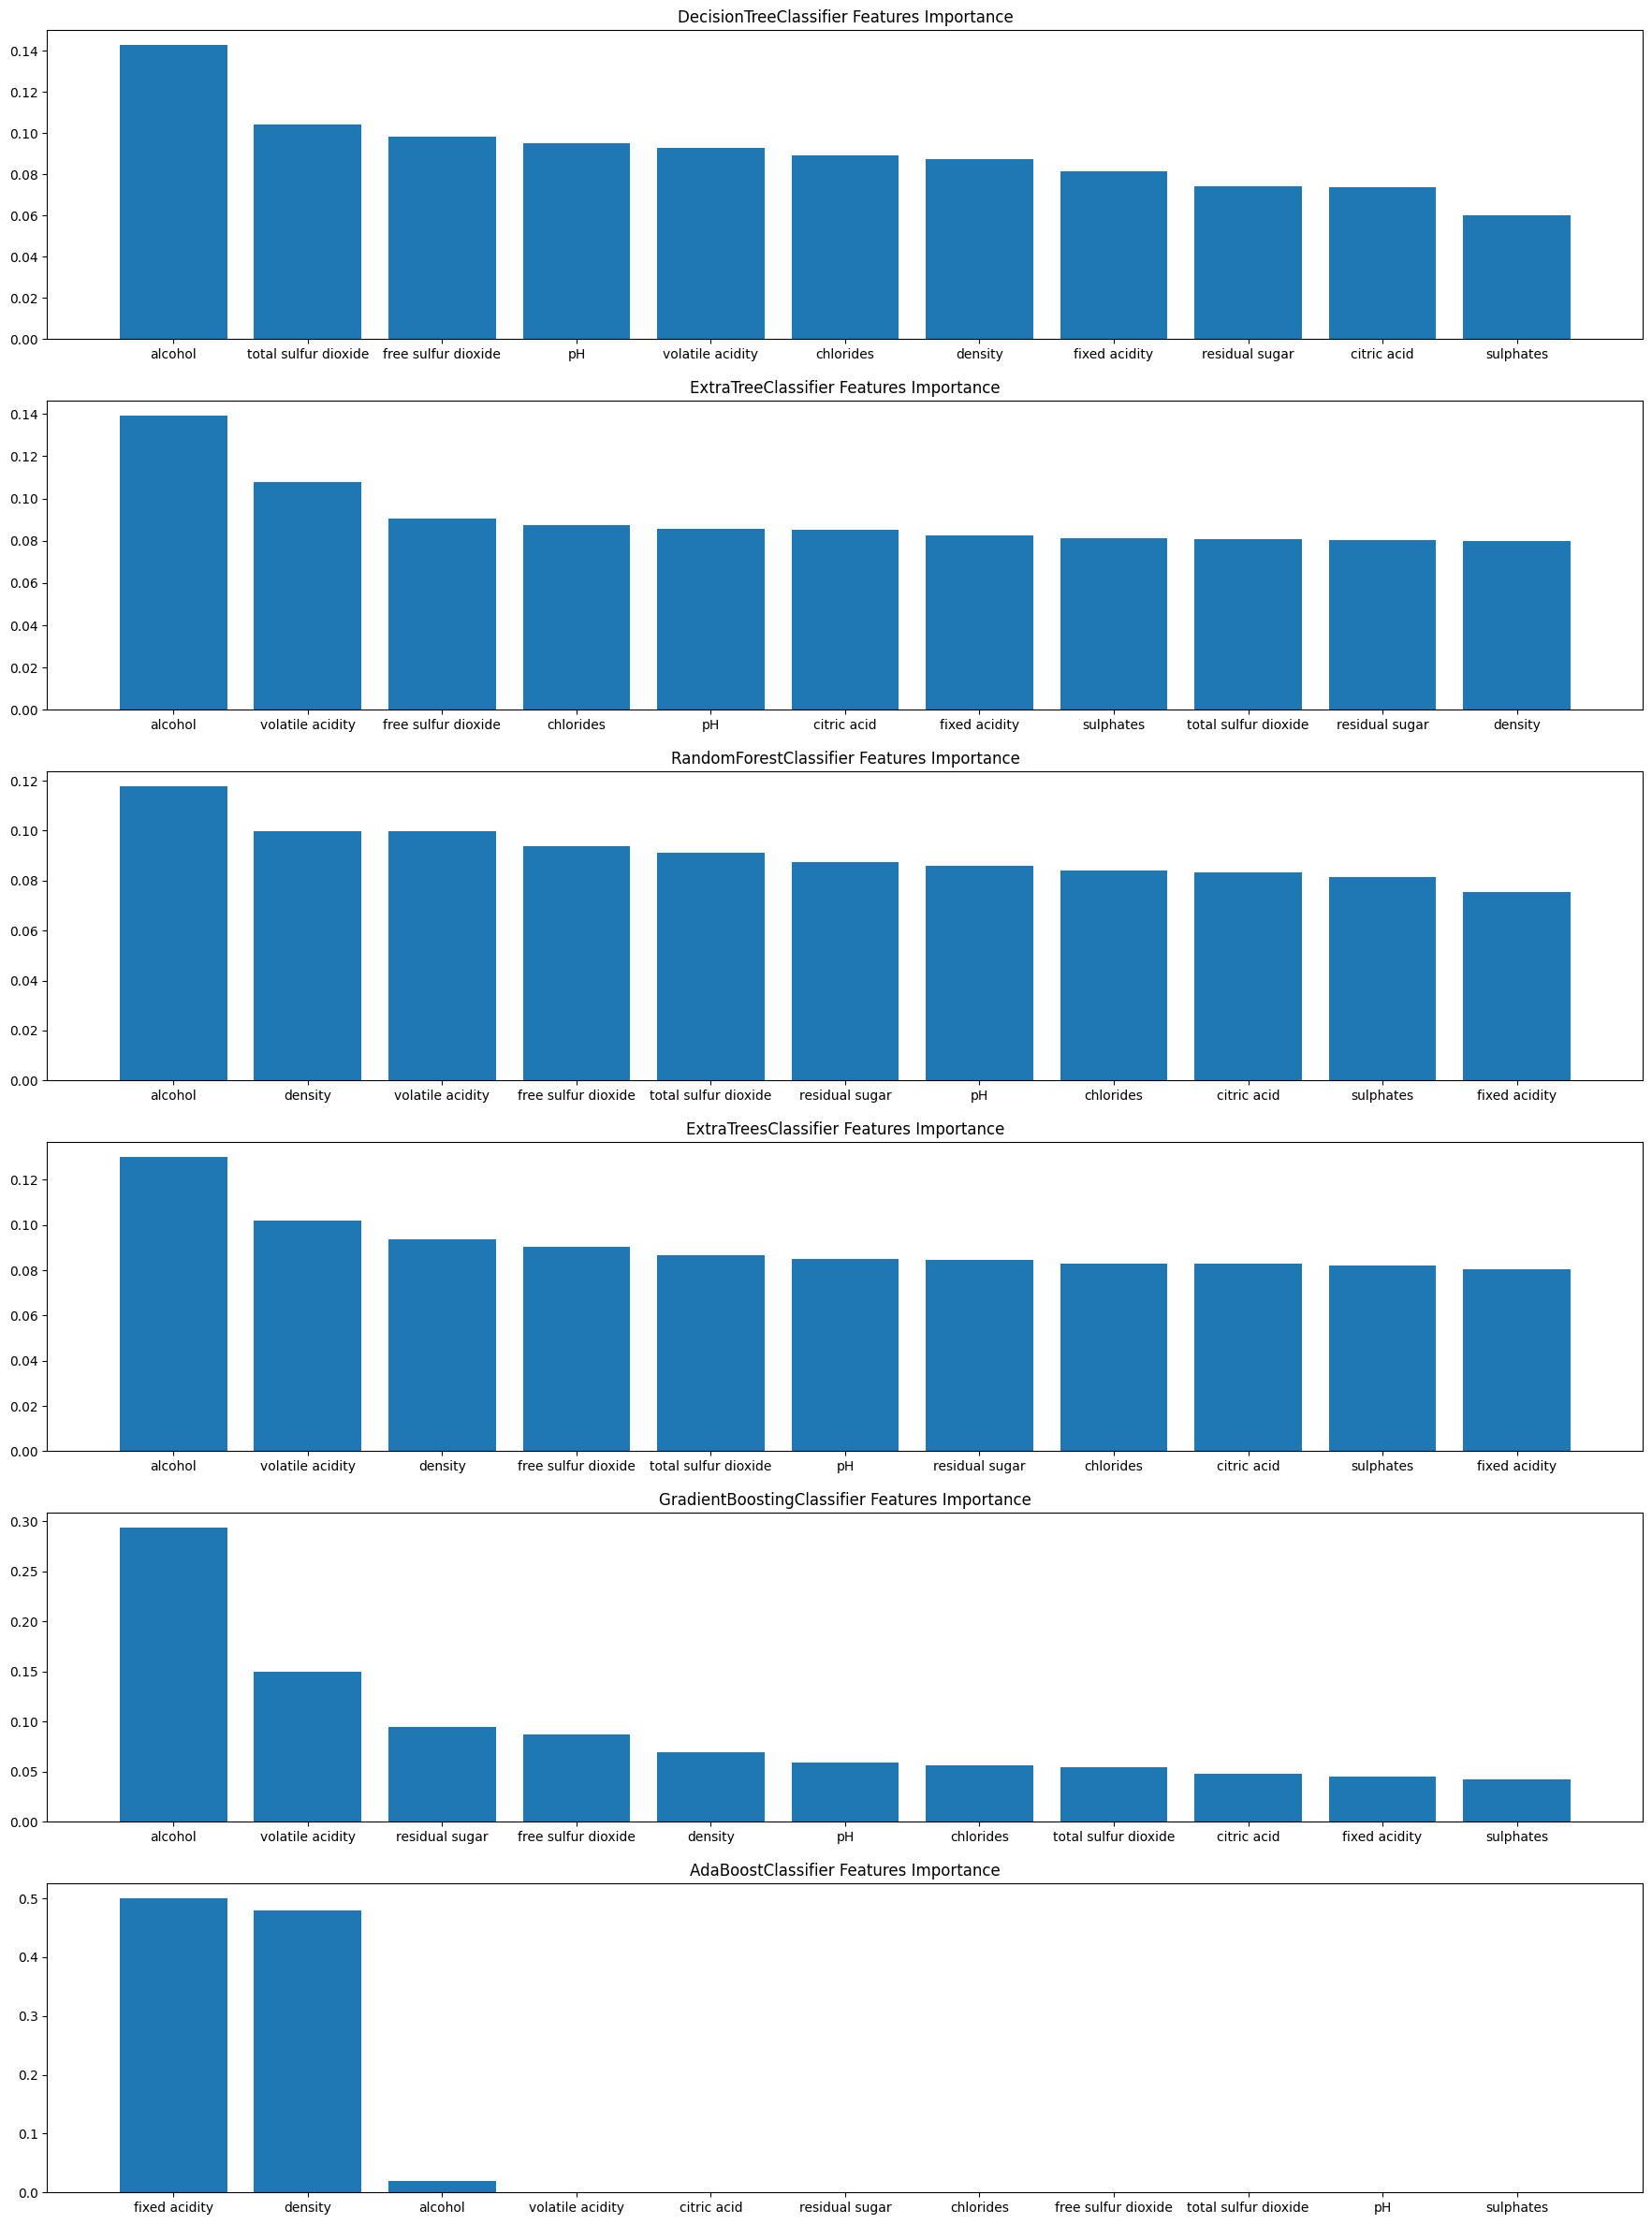

In [ ]:
tree_models = [DecisionTreeClassifier(), ExtraTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]
fig, ax = plt.subplots(nrows=int(np.floor(len(tree_models)/1)), figsize = (2*(len(df.columns)-1), 5*len(tree_models)))

for idx, tree_model in enumerate(tree_models):
  tree_model.fit(df.drop([target_field],axis=1), df[target_field])
  important_features = pd.Series(tree_model.feature_importances_, index = df.drop([target_field],axis=1).columns)
  important_features = important_features.sort_values(ascending=False)

  ax[idx].bar(x = important_features.index, height = important_features.values);
  ax[idx].set_title(tree_model.__class__.__name__ + " Features Importance");

# Selección de características


*   Conclusiones
*   Seleccionón
*   Escalado (omitir)



## Conclusiones

Si atendemos a la correlación de las variables y al SelectKBest vemos que las variables density y chlorides pasan a tener más importancia con respecto a los resultados obtenidos con el dataset de vinos tintos. En detrimento de otras como sulphates y citric acid. Esto nos da una idea de que una estrategia a plantear sería hace una selección de características diferente para este dataset.

Por ello entre las 11 características existentes finalmente se han seleccionado:
-	alcohol es la mejor variable en prácticamente cualquier comparación.
-	density ha estado siempre en las mejores posiciones.
-	volatile acidity ha estado siempre en las mejores posiciones.
-	chlorides está entre las mejores características en correlación.
-	total sulfur dioxide obtuvo buena posición como característica importante de los modelos de árboles entrenados y en el método SelectKBest.

Por otro lado las variables descartadas son:
-	residual sugar no tiene casi ninguna correlación con quality.
-	free sulfur dioxide no tiene casi ninguna correlación con quality. Además tiene buena correlación con total sulfur dioxide, por lo que no es necesaria si se puede usar dicha variable para hacer divisiones similares y con mejor resultado.
-	pH no tiene casi ninguna correlación con quality.
-	fixed acidity no está bien posicionada como característica importante para los árboles entrenados ni tiene buena correlación con quality.
-	citric acid no está bien posicionada como característica importante para los árboles entrenados ni tiene buena correlación con quality.
-	sulphates no está bien posicionada como característica importante para los árboles entrenados ni tiene buena correlación con quality.

## Selección

In [ ]:
df = df[['quality', 'alcohol', 'volatile acidity', 'total sulfur dioxide', 'density', 'chlorides']]

# Visualización de un registro de cada categoría
display(df.drop_duplicates(target_field, keep='first'))
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

quality  alcohol  volatile acidity  total sulfur dioxide  density  \
0          6      8.8              0.27                 170.0   1.0010   
10         5     12.0              0.27                  63.0   0.9908   
13         7     12.4              0.16                 143.0   0.9912   
17         8     12.8              0.66                  75.0   0.9892   
46         4      9.8              0.45                 206.0   0.9940   
251        3      9.8              0.26                 197.0   0.9980   
774        9     10.4              0.27                 124.0   0.9970   

     chlorides  
0        0.045  
10       0.033  
13       0.044  
17       0.029  
46       0.063  
251      0.074  
774      0.035

4898 rows x 6 columns


## Escalado de las columnas seleccionadas.

Los árboles no requieren que los datos sean escalados o normalizados antes del entrenamiento.
Las divisiones o "splits" de los árboles se realizan evaluando las características una por una y eligiendo el mejor punto de corte, independientemente de la escala de los valores de las características.

In [ ]:
scale_applied = False #True si se quiere aplicar escalado MinMaxScaler

if scale_applied:
  #Se escala las columnas seleccionadas a excepción de la variable dependdiente
  scaler = MinMaxScaler()
  columns = df.drop([target_field], axis=1).columns
  scaler.fit(df[columns])
  df[columns] = scaler.transform(df[columns])

  # Visualización de un registro de cada categoría
  display(df.drop_duplicates(target_field, keep='first'))
  print(f"{df.shape[0]} rows x {df.shape[1]} columns")

Exportación del fichero MinMaxScaler.pkl con el scaler entrenado.

In [ ]:
if scale_applied:
  #Se exporta el scaler entrenado a un fichero pkl.
  joblib.dump(scaler, open('MinMaxScaler.pkl', 'wb'))

# Separación del dataset en train, test y validation

1. Se separan datos de entrada y de salida
2. Se separan datos de entrenamiento y test
3. Se separan datos de entrenamiento en entrenamiento y validación (omitir)





## 1. Se separan datos de entrada y de salida

In [ ]:
##########
# PASO 1 #
##########

# Se separan los datos de entrada y salida
X = df.drop(target_field, axis=1)
y = df[target_field]
display(X)

alcohol  volatile acidity  total sulfur dioxide  density  chlorides
0         8.8              0.27                 170.0  1.00100      0.045
1         9.5              0.30                 132.0  0.99400      0.049
2        10.1              0.28                  97.0  0.99510      0.050
3         9.9              0.23                 186.0  0.99560      0.058
4         9.9              0.23                 186.0  0.99560      0.058
...       ...               ...                   ...      ...        ...
4893     11.2              0.21                  92.0  0.99114      0.039
4894      9.6              0.32                 168.0  0.99490      0.047
4895      9.4              0.24                 111.0  0.99254      0.041
4896     12.8              0.29                 110.0  0.98869      0.022
4897     11.8              0.21                  98.0  0.98941      0.020

[4898 rows x 5 columns]

## 2. Se separan datos de entrenamiento y test

In [ ]:
##########
# PASO 2 #
##########

# Se separan datos de train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Visualización de registros de cada categoría
train_samples = ytrain.value_counts()
test_samples = ytest.value_counts()
samples = pd.concat([train_samples, train_samples/len(ytrain), test_samples, test_samples/len(ytest)],
                    axis=1,
                    keys=["train", "train(%)", "test", "test(%)"])

# Editamos los índices en caso de ser valores numéricos
if target_field_to_categorical:
  samples.index = target_field[samples.index]

samples

train  train(%)  test   test(%)
6   1758  0.448698   440  0.448980
5   1166  0.297601   291  0.296939
7    704  0.179684   176  0.179592
8    140  0.035733    35  0.035714
4    130  0.033180    33  0.033673
3     16  0.004084     4  0.004082
9      4  0.001021     1  0.001020

## 3. Se separan datos de entrenamiento en entrenamiento y validación

Al realizar posteriormente un entrenamiento con Cross Validation a través de la librería StratifiedKFold, esta separación es innecesaria pues los datos de validación se extraen directamente al aplicar dicho algoritmo. Es por ello que los valores obtenidos de dividir los datos en esta celda no se usan en este caso.

Sólo en el caso de entrenar el modelo sin Cross Validation tendría sentido hacer esta separación.

In [ ]:
##########
# PASO 3 #
##########

split_validation_data  = False

# Se separan datos de train y validation
Xtrain_val, Xvalidation, ytrain_val, yvalidation = train_test_split(Xtrain, ytrain, stratify=ytrain, test_size=0.20, random_state=42)

if split_validation_data:
  Xtrain = Xtrain_val
  ytrain = ytrain_val

# Visualización de registros de cada categoría
train_val_samples = ytrain_val.value_counts()
val_samples = yvalidation.value_counts()
samples = pd.concat([train_val_samples, train_val_samples/len(ytrain_val), val_samples, val_samples/len(yvalidation), test_samples, test_samples/len(ytest)],
                    axis=1,
                    keys=["train", "train(%)", "validation", "validation(%)", "test", "test(%)"])

# Editamos los índices en caso de ser valores numéricos
if target_field_to_categorical:
  samples.index = target_field[samples.index]

samples

train  train(%)  validation  validation(%)  test   test(%)
6   1406  0.448628         352       0.448980   440  0.448980
5    933  0.297703         233       0.297194   291  0.296939
7    563  0.179643         141       0.179847   176  0.179592
8    112  0.035737          28       0.035714    35  0.035714
4    104  0.033184          26       0.033163    33  0.033673
3     13  0.004148           3       0.003827     4  0.004082
9      3  0.000957           1       0.001276     1  0.001020

# Funciones de entrenamiento

1. Se instancia el modelo
2. Se usa cross validation para extraer datos de validación de los datos de entrenamiento
3. Se entrena en el modelo con los datos de entrenamiento
4. Se predice el target para los datos de validación
5. Se realiza la evaluación del modelo
6. Se obtiene la precisión de los datos de test

##  Función de entrenamiento con Cross Validation

In [ ]:
# Función de entrenamiento con Cross Validation (Validación cruzada)
def train_model_with_cross_validation(model, X, y, n_splits=4, shuffle=True, random_state=42):

  ##########
  # PASO 2 #
  ##########

  # Entrenamiento con cross validation para la instancia actual
  cv = StratifiedKFold(n_splits = n_splits, shuffle = shuffle, random_state=random_state) # shuffle = False si hay dimensión temporal
  fold_accuracy = []
  for train_fold, validation_fold in cv.split(X, y):

    # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_x = X.iloc[train_fold]
    f_train_y = y.iloc[train_fold]

    ##########
    # PASO 3 #
    ##########

    # Entrenamos el modelo con los datos de entrenamiento
    model.fit(f_train_x, f_train_y)

    ##########
    # PASO 4 #
    ##########

    # Predicicón de la validación
    y_model = model.predict(X.iloc[validation_fold])

    ##########
    # PASO 5 #
    ##########

    # Evaluación y cálculo de la precisión para cada iteración
    accuracy = accuracy_score(y.iloc[validation_fold], y_model)
    fold_accuracy.append(accuracy)

  return sum(fold_accuracy)/len(fold_accuracy)

## Función que crea un modelo y lo entrena con Cross Validation

In [ ]:
# Función para entrenamiento, predicción y evaluación de un modelo.
def train_model(model_name, Xtrain, ytrain, show_info=True, export_model=False):

  ##########
  # PASO 1 #
  ##########

  # Obtenemos la clase y parámetros del modelo a partir de su nombre
  model_class = globals()[model_name]
  model = model_class(**models_list[model_name])


  #############
  # PASOS 2-5 #
  #############

  #Entrenamiento del modelo con cross_validation
  accuracy = train_model_with_cross_validation(model, Xtrain, ytrain)

  if show_info:
    print(f"Modelo: {model_name}")
    print(f"Precisión del modelo: {accuracy:.4}")
    print("---------------------")

  if export_model:
    #Guardamos el modelo en un fichero PKL con su nombre
    joblib.dump(model, open(model_name + '.pkl', 'wb'))

  return model, accuracy

## Función que entrena un modelo con Cross Validation y contrasta con el test

In [ ]:
# Función para entrenamiento, predicción y evaluación de un modelo.
def train_and_validate_model(model_name, Xtrain, ytrain, Xtest, ytest, export_model=False):

  #############
  # PASOS 1-5 #
  #############

  model, val_accuracy = train_model(model_name, Xtrain, ytrain, show_info=False, export_model=export_model)

  ##########
  # PASO 6 #
  ##########

  # Predicción de los datos de test con el modelo entrenado
  y_pred = model.predict(Xtest)
  test_accuracy = accuracy_score(y_pred, ytest)

  print(f"Modelo: {model_name}")
  print(f"Precisión del modelo: {val_accuracy:.4}")
  print(f"Predicción Test: {test_accuracy:.4}")
  print("---------------------")

  return model, val_accuracy, test_accuracy, y_pred

# Comparativa de árboles con Cross Validation


1. Parametrización de cada modelo de árbol (manualmento o mediante búsqueda de parámetros)
2. Se comparan las precisiones de los modelos

## 1. Parametrización manual

In [ ]:
# Diccionario con los modelos a comparar y los hiperparámetros configurados
models_list = {}

#Inicializamos valores por defecto
random_state = 42
n_estimators = 100
criterion = 'gini'
splitter = 'best'

models_list['DecisionTreeClassifier'] = {
    'criterion': criterion,
    'random_state': random_state
}

models_list['ExtraTreeClassifier'] = {
    'criterion': criterion,
    'splitter': splitter,
    'random_state': random_state
}

models_list['RandomForestClassifier'] = {
    'criterion': criterion,
    'n_estimators': n_estimators,
    'random_state': random_state
}

models_list['ExtraTreesClassifier'] = {
    'criterion': criterion,
    'n_estimators': n_estimators,
    'random_state': random_state
}

models_list['GradientBoostingClassifier'] = {
    'n_estimators': n_estimators,
    'random_state': random_state
}

models_list['AdaBoostClassifier'] = {
    'n_estimators': n_estimators,
    'random_state': random_state
}

models_list['BaggingClassifier'] = {
    'n_estimators': n_estimators,
    'random_state': random_state
}

## 1. Parametrización mediante búsqueda de parámetros

### Inicializar parámetros y valores genéricos

In [ ]:
# Tupla con los modelos a comparar
models_list = {}
random_state = 42
criterion_options = ['gini', 'entropy', "log_loss"]
splitter_options = ['random', 'best']
n_estimators_params = [20,300,20] #min, max, step
step = n_estimators_params[2]

### DecisionTreeClassifier
Árbol de Decisión simple comparadando el criterio a usar entre 'gini', 'entropy' y 'log_loss'

In [ ]:
name_model = 'DecisionTreeClassifier'

# Iteraciones con los parámetros a comparar
max_accuracy = 0
for criterion in criterion_options:

  # Se instancia el modelo de árbol con las métricas de la iteración
  model = DecisionTreeClassifier(criterion=criterion, random_state=random_state) # El criterio por defecto es giny

  # Entrenamiento del modelo con cross_validation
  accuracy = train_model_with_cross_validation(model, Xtrain, ytrain)

  # Actualización de parámetros
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    models_list[name_model] = {
        'criterion': criterion,
        'random_state': random_state
    }

  #Resultados
  print ('Acurracy ' +  criterion + " : " +  str(accuracy))

print("----------------------------------------------------------")
print ('Best Value ' +  models_list[name_model]['criterion'] + " : " +  str(max_accuracy))

Acurracy gini : 0.5505401701027705
Acurracy entropy : 0.5451817243751433
Acurracy log_loss : 0.5451817243751433
----------------------------------------------------------
Best Value gini : 0.5505401701027705


### ExtraTreeClassifier
ExtraTree comparadando el criterio a usar entre 'gini', 'entropy' y 'log_loss' y el splitter entre 'random' y 'best'

In [ ]:
name_model = 'ExtraTreeClassifier'

# Iteraciones con los parámetros a comparar
max_accuracy = 0
for criterion in criterion_options:
  for splitter in splitter_options:
    total_scores = []

    # Se instancia el modelo de árbol con las métricas de la iteración
    model = ExtraTreeClassifier(criterion=criterion, splitter=splitter, random_state=random_state) # El criterio por defecto es giny

    #Entrenamiento del modelo con cross_validation
    accuracy = train_model_with_cross_validation(model, Xtrain, ytrain)

    # Actualización de parámetros
    if accuracy > max_accuracy:
      max_accuracy = accuracy
      models_list[name_model] = {
          'criterion': criterion,
          'splitter': splitter,
          'random_state': random_state
      }

    #Resultados
    print ('Acurracy ' +  criterion + '-' + splitter + " : " +  str(accuracy))

print("----------------------------------------------------------")
print ('Best Value ' +  models_list[name_model]['criterion'] + '-' + models_list[name_model]['splitter'] + " : " +  str(max_accuracy))

Acurracy gini-random : 0.564580163015155
Acurracy gini-best : 0.5612554981134436
Acurracy entropy-random : 0.5574344395572326
Acurracy entropy-best : 0.558715421817348
Acurracy log_loss-random : 0.5574344395572326
Acurracy log_loss-best : 0.558715421817348
----------------------------------------------------------
Best Value gini-random : 0.564580163015155


### RandomForestClassifier

Random Forest comparadando el número de estimadores y el criterio a usar entre 'gini', 'entropy' y 'log_loss'

Max Value gini : 0.6416618894748911 (80)
Max Value entropy : 0.6403871609931 (200)
Max Value log_loss : 0.6403871609931 (200)
----------------------------------------------------------
Best Value gini : 0.6416618894748911 (80)


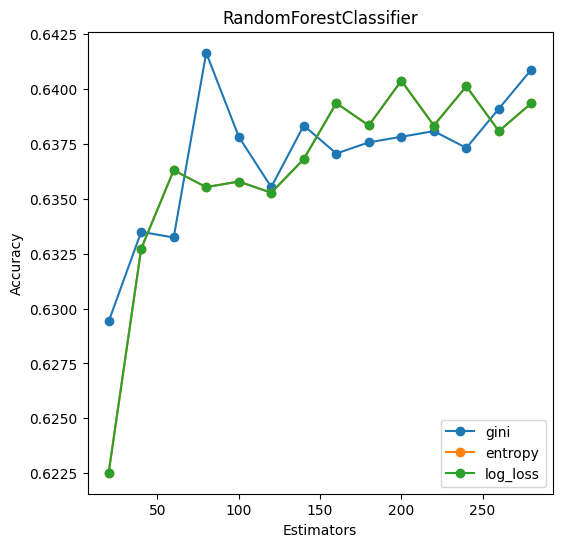

In [ ]:
name_model = 'RandomForestClassifier'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (6,6))

# Iteraciones con los parámetros a comparar
max_accuracy = 0
for criterion in criterion_options:
  total_scores = []
  for n_estimators in range(n_estimators_params[0],n_estimators_params[1],step):

    # Se instancia el modelo de árbol con las métricas de la iteración
    model = RandomForestClassifier(n_estimators, criterion=criterion, random_state=random_state) # El criterio por defecto es giny

    #Entrenamiento del modelo con cross_validation
    accuracy = train_model_with_cross_validation(model, Xtrain, ytrain)
    total_scores.append(accuracy)

    # Actualización de parámetros
    if accuracy > max_accuracy:
      max_accuracy = accuracy
      models_list[name_model] = {
          'n_estimators': n_estimators,
          'criterion': criterion,
          'random_state': random_state
    }

  #Resultados
  print ('Max Value ' +  criterion + " : " +  str(max(total_scores)) +" (" + str((np.argmax(total_scores) + 1) *step) + ")")
  ax.plot(range(step,(len(total_scores)+1)*step, step), total_scores, marker='o', label=criterion)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Estimators')
ax.set_title(name_model)
ax.legend()

print("----------------------------------------------------------")
print ('Best Value ' +  models_list[name_model]['criterion'] + " : " +  str(max_accuracy) +" (" + str(models_list[name_model]['n_estimators']) + ")")
fig.show()

### ExtraTreesClassifier

ExtraTrees comparadando el número de estimadores y el criterio a usar entre 'gini', 'entropy' y 'log_loss'

Max Value gini : 0.6431951074607575 (180)
Max Value entropy : 0.6457474307394051 (240)
Max Value log_loss : 0.6457474307394051 (240)
----------------------------------------------------------
Best Value entropy : 0.6457474307394051 (240)


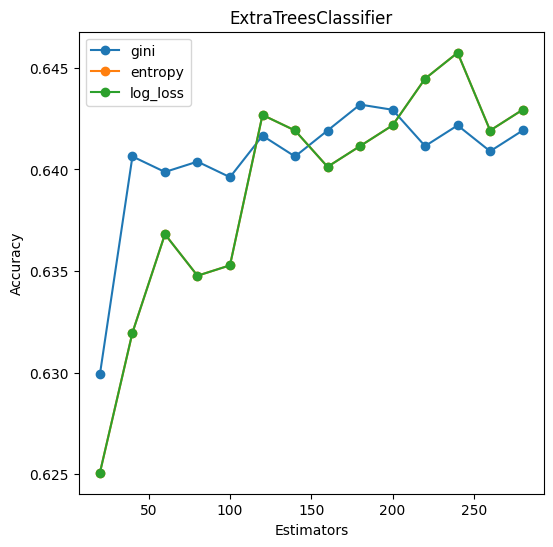

In [ ]:
name_model = 'ExtraTreesClassifier'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (6,6))

# Iteraciones con los parámetros a comparar
max_accuracy = 0
for criterion in criterion_options:
  total_scores = []
  for n_estimators in range(n_estimators_params[0],n_estimators_params[1],step):

    # Se instancia el modelo de árbol con las métricas de la iteración
    model = ExtraTreesClassifier(n_estimators, criterion=criterion, random_state=random_state) # El criterio por defecto es giny

    #Entrenamiento del modelo con cross_validation
    accuracy = train_model_with_cross_validation(model, Xtrain, ytrain)
    total_scores.append(accuracy)

    # Actualización de parámetros
    if accuracy > max_accuracy:
      max_accuracy = accuracy
      models_list[name_model] = {
          'n_estimators': n_estimators,
          'criterion': criterion,
          'random_state': random_state
    }

  #Resultados
  print ('Max Value ' +  criterion + " : " +  str(max(total_scores)) +" (" + str((np.argmax(total_scores) + 1) *step) + ")")
  ax.plot(range(step,(len(total_scores)+1)*step, step), total_scores, marker='o', label=criterion)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Estimators')
ax.set_title(name_model)
ax.legend()

print("----------------------------------------------------------")
print ('Best Value ' +  models_list[name_model]['criterion'] + " : " +  str(max_accuracy) +" (" + str(models_list[name_model]['n_estimators']) + ")")
fig.show()

### GradientBoostingClassifier

Gradient Boosting comparando el número de estimadores.

Max value : 0.5908692230722729 (280 stimators)


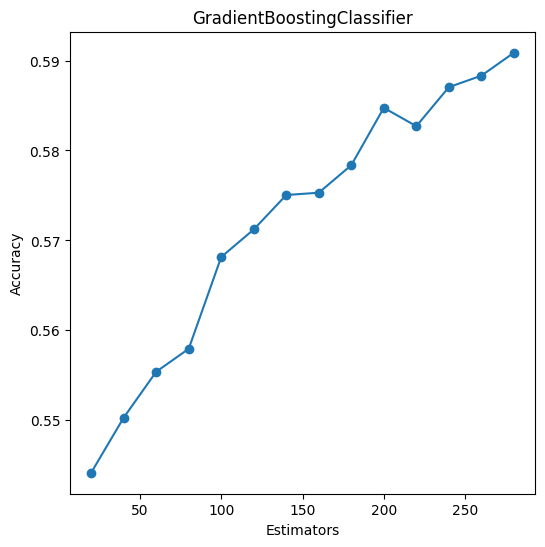

In [ ]:
name_model = 'GradientBoostingClassifier'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (6,6))

# Iteraciones con los parámetros a comparar
max_accuracy = 0
total_scores = []
for n_estimators in range(n_estimators_params[0],n_estimators_params[1],step):

  # Se instancia el modelo de árbol con las métricas de la iteración
  model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=random_state)

  #Entrenamiento del modelo con cross_validation
  accuracy = train_model_with_cross_validation(model, Xtrain, ytrain)
  total_scores.append(accuracy)

  # Actualización de parámetros
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    models_list[name_model] = {
        'n_estimators': n_estimators,
        'random_state': random_state
  }

#Resultados
print ('Max value : ' +  str(max(total_scores)) +" (" + str((np.argmax(total_scores) + 1) *step) + " stimators)")
ax.plot(range(step,(len(total_scores)+1)*step, step), total_scores, marker='o')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Estimators')
ax.set_title(name_model)
fig.show()

### AdaBoostClassifier

Ada Boost comparando el número de estimadores.

Max value : 0.4395184069542015 (20 stimators)


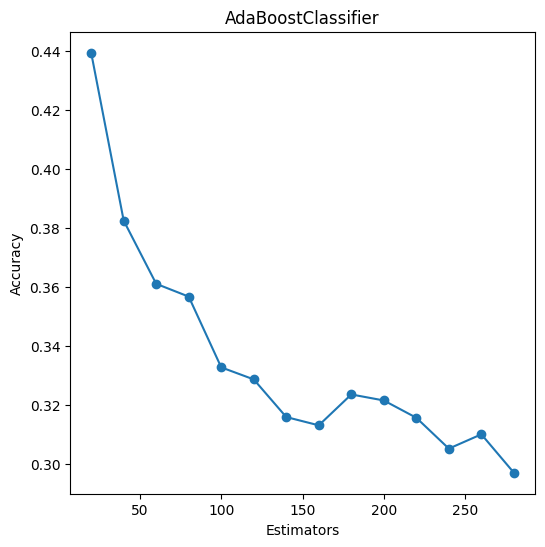

In [ ]:
name_model = 'AdaBoostClassifier'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (6,6))

# Iteraciones con los parámetros a comparar
max_accuracy = 0
total_scores = []
for n_estimators in range(n_estimators_params[0],n_estimators_params[1],step):

  # Se instancia el modelo de árbol con las métricas de la iteración
  model = AdaBoostClassifier(n_estimators=n_estimators, random_state=random_state)

  #Entrenamiento del modelo con cross_validation
  accuracy = train_model_with_cross_validation(model, Xtrain, ytrain)
  total_scores.append(accuracy)

  # Actualización de parámetros
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    models_list[name_model] = {
        'n_estimators': n_estimators,
        'random_state': random_state
  }

#Resultados
print ('Max value : ' +  str(max(total_scores)) +" (" + str((np.argmax(total_scores) + 1) *step) + " stimators)")
ax.plot(range(step,(len(total_scores)+1)*step, step), total_scores, marker='o')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Estimators')
ax.set_title(name_model)
fig.show()

### BaggingClassifier

Bagging comparando el número de estimadores.

Max value : 0.6294086531446081 (160 stimators)


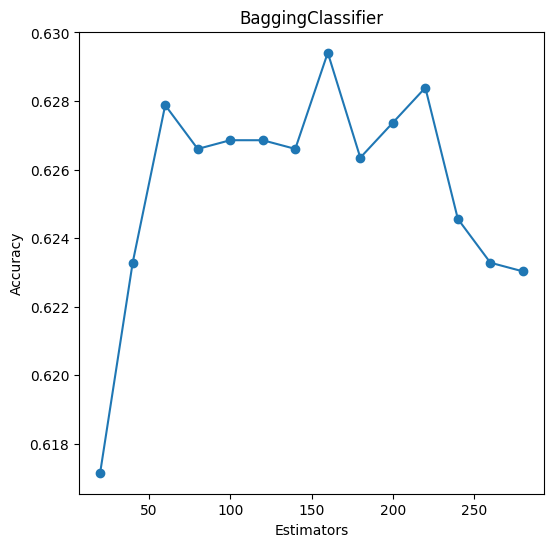

In [ ]:
name_model = 'BaggingClassifier'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (6,6))

# Iteraciones con los parámetros a comparar
max_accuracy = 0
total_scores = []
for n_estimators in range(n_estimators_params[0],n_estimators_params[1],step):

  # Se instancia el modelo de árbol con las métricas de la iteración
  model = BaggingClassifier(n_estimators=n_estimators, random_state=random_state)

  #Entrenamiento del modelo con cross_validation
  accuracy = train_model_with_cross_validation(model, Xtrain, ytrain)
  total_scores.append(accuracy)

  # Actualización de parámetros
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    models_list[name_model] = {
        'n_estimators': n_estimators,
        'random_state': random_state
  }

#Resultados
print ('Max value : ' +  str(max(total_scores)) +" (" + str((np.argmax(total_scores) + 1) *step) + " stimators)")
ax.plot(range(step,(len(total_scores)+1)*step, step), total_scores, marker='o')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Estimators')
ax.set_title(name_model)
fig.show()

## Comprobar los modelos a comparar y sus parámetros

In [ ]:
models_list

{'DecisionTreeClassifier': {'criterion': 'gini', 'random_state': 42},
 'ExtraTreeClassifier': {'criterion': 'gini',
  'splitter': 'random',
  'random_state': 42},
 'RandomForestClassifier': {'n_estimators': 80,
  'criterion': 'gini',
  'random_state': 42},
 'ExtraTreesClassifier': {'n_estimators': 240,
  'criterion': 'entropy',
  'random_state': 42},
 'GradientBoostingClassifier': {'n_estimators': 280, 'random_state': 42},
 'AdaBoostClassifier': {'n_estimators': 20, 'random_state': 42},
 'BaggingClassifier': {'n_estimators': 160, 'random_state': 42}}

## 2 . Se comparan los modelos

In [ ]:
# Llamada a la función de entrenamiento para cada modelo
models = []
best_accuracy = 0
best_model_name = ''

for i, model_name in enumerate(models_list):
  model = (list(train_and_validate_model(model_name, Xtrain, ytrain, Xtest, ytest)))
  models.append(model)

  if best_accuracy < model[1]:
    best_accuracy = model[1]
    best_model_name = model[0].__class__.__name__

print('Mejor modelo:', best_model_name)

Modelo: DecisionTreeClassifier
Precisión del modelo: 0.5505
Predicción Test: 0.5408
---------------------
Modelo: ExtraTreeClassifier
Precisión del modelo: 0.5646
Predicción Test: 0.5337
---------------------
Modelo: RandomForestClassifier
Precisión del modelo: 0.6417
Predicción Test: 0.6173
---------------------
Modelo: ExtraTreesClassifier
Precisión del modelo: 0.6457
Predicción Test: 0.6041
---------------------
Modelo: GradientBoostingClassifier
Precisión del modelo: 0.5909
Predicción Test: 0.5429
---------------------
Modelo: AdaBoostClassifier
Precisión del modelo: 0.4395
Predicción Test: 0.4551
---------------------
Modelo: BaggingClassifier
Precisión del modelo: 0.6294
Predicción Test: 0.5898
---------------------
Mejor modelo: ExtraTreesClassifier


# Entrenamiento del modelo

1. Se entrena y se exporta el modelo
2. Se importa el modelo y se vuelven a predecir los datos de predicción.

## 1. Se entrena y se exporta el modelo



Se llama a la función definido anteriormente

In [ ]:
# Llamada a la función de entrenamiento para el mejor modelo
model = (list(train_and_validate_model(best_model_name, Xtrain, ytrain, Xtest, ytest, export_model=True)))

# Añadimos el modelo para comparar las matrices de confusión
best_models = []
best_models.append(model)
best_model_names = [best_model_name]

Modelo: ExtraTreesClassifier
Precisión del modelo: 0.6457
Predicción Test: 0.6041
---------------------


## 2. Se importa el modelo y se vuelven a predecir los datos de predicción.

Se puede observar que los datos del modelo importado coinciden con los del modelo que se exportó

In [ ]:
# Se importa el modelo
imported_model = joblib.load(best_model_name + '.pkl')

# Precisión de los datos de test con el modelo importado usando cross_val_score
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
scores = cross_val_score(imported_model, Xtrain, ytrain, cv=cv, scoring='accuracy')
val_accuracy = scores.mean()

# Predicción de los datos de test con el modelo importado
y_pred = imported_model.predict(Xtest)
test_accuracy = accuracy_score(y_pred, ytest)

# Visualización de resultados
print(f"Modelo importado: {imported_model.__class__.__name__}")
print(f"Precisión del modelo importado: {val_accuracy:.4}")
print(f"Predicción Test con modelo importado: {test_accuracy:.4}")

# Añadimos el modelo para comparar las matrices de confusión
best_models.append([imported_model, val_accuracy, test_accuracy, y_pred])
best_model_names.append(best_model_name + ' importado')

Modelo importado: ExtraTreesClassifier
Precisión del modelo importado: 0.6457
Predicción Test con modelo importado: 0.6041


# Visualización de resultados

## Seleccionamos los modelos a representar

Si se quiere representar la matriz de confusión de los modelos comparados anteriormente, en lugar de las dos versiones del mejor modelo, se puede poner la variable a True y ejecutar esta celda.

In [ ]:
# Si False se muetsran las dos versiones del mejor modelo, si True se muestran todos los árboles comparados.
compare_tree_models = False

if compare_tree_models:
  model_names = list(models_list.keys())
  models_to_show = models
else:
  model_names = best_model_names
  models_to_show = best_models

## Transformación de variables categóricas reales a valores enteros

In [ ]:
##########
# PASO 1 #
##########

# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df = ytest.copy()
ytest_df = ytest_df.to_frame()
ytest_df[target_field].replace(target_categories,range(len(target_categories)), inplace=True)

def transform_to_categorical_array(y_model):
  # Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
  y_model_df = y_model.copy()
  y_model_df= pd.DataFrame(y_model_df, columns = [target_field])
  y_model_df[target_field].replace(np.sort(target_categories),range(len(target_categories)), inplace=True)
  # Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
  y_model_array = y_model_df[target_field].to_numpy()
  return y_model_array

## Función para mostrar la matriz de confusión

In [ ]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante
# y_true     : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred     : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# classes    : ndarray   -> Los nombres de las clases/valores objetivos como array de numpy
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None,
                          fig=None,
                          ax=None):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if not fig:
      fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=titleSup,
           ylabel='True label',
           xlabel='Predicted label')
    ax.annotate(title, xy=(0.5, 1.1), xytext=(0, 10),
            xycoords='axes fraction', textcoords='offset points',
            ha='center', va='baseline', fontsize=10)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    fig.tight_layout()
    fig.suptitle(title, fontsize=16, y=1, ha='center')
    return ax

## Matriz de confusión sin normalizar

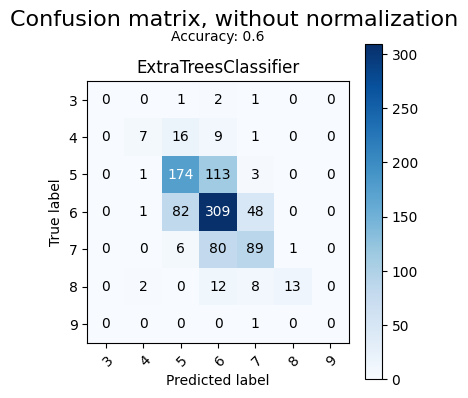

In [ ]:
# Creamos el contenedor para representar los resultados
fig, ax = plt.subplots(nrows=1, ncols = len(model_names), figsize = (4*len(model_names),4))

# Representamos la matriz de confusión para cada modelo asignando los parámetros
for idx, model in enumerate(models_to_show):

  # Transformamos variables categóricas a valores numéricos/enteros
  y_model_array = transform_to_categorical_array(models_to_show[idx][3])

  # Creamos este array de numpy porque es el parámetro con las clases que espera la función
  classes = np.array(target_categories)
  plot_confusion_matrix(ytest_df[target_field],
                        y_model_array,
                        classes=classes,
                        normalize=False,
                        title=f'Accuracy: {str(round(model[2],2))}',
                        titleSup=model_names[idx],
                        fig=fig,
                        ax=ax[idx%len(model_names)] if len(model_names) > 1 else ax)


## Matriz de confusión normalizada

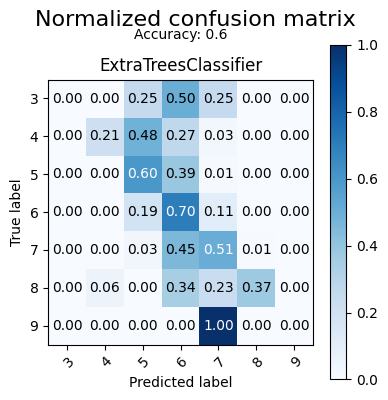

In [ ]:
# Creamos el contenedor para representar los resultados normalizados
fig, ax = plt.subplots(nrows=1, ncols = len(model_names), figsize = (4*len(model_names),4))

# Representamos la matriz de confusión normalizada para cada modelo asignando los parámetros
for idx, model in enumerate(models_to_show):

  y_model_array = transform_to_categorical_array(models_to_show[idx][3])

  # Creamos este array de numpy porque es el parámetro con las clases que espera la función
  classes = np.array(target_categories)
  plot_confusion_matrix(ytest_df[target_field],
                        y_model_array,
                        classes=classes,
                        normalize=True,
                        title=f'Accuracy: {str(round(model[2],2))}',
                        titleSup=model_names[idx],
                        fig=fig,
                        ax=ax[idx%len(model_names)] if len(model_names) > 1 else ax)

## Plot comparativo

Como este problema de clasificación tiene un conjunto de categoría que corresponden con datos enteros consecutivos, es interesante aplicar un plot de igual modo que se usa en un problema de regresión para obsevar el error.

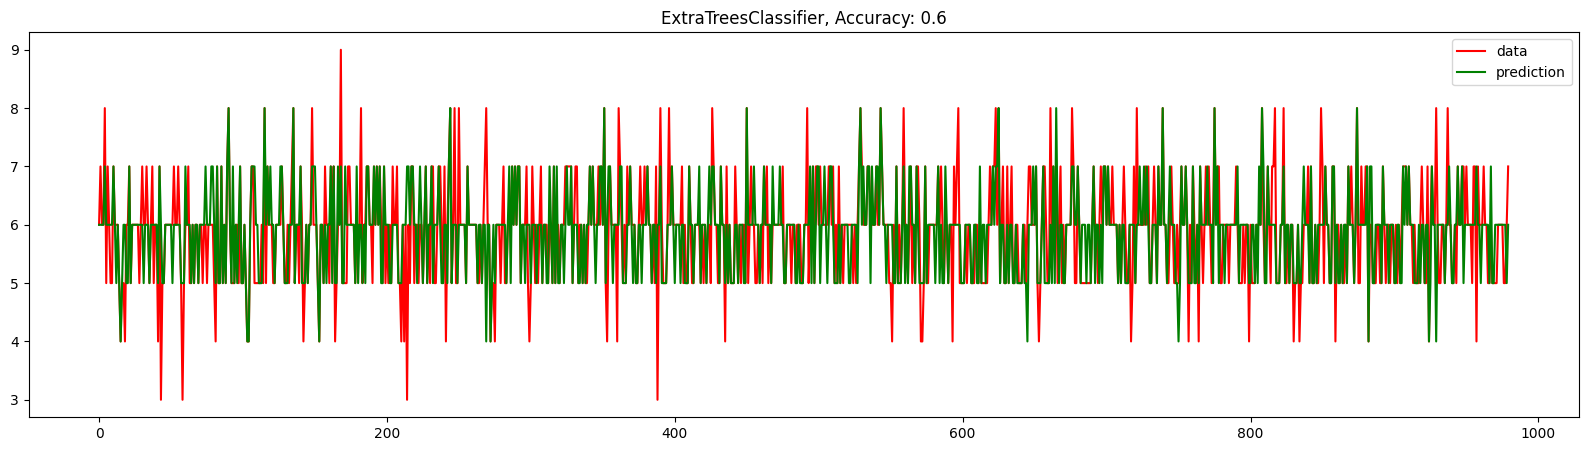

In [ ]:
# Creamos el contenedor para representar los resultados
fig, ax = plt.subplots(nrows = len(model_names), ncols = 1, figsize = (20, 5*len(model_names)))

# Representamos la matriz de confusión para cada modelo asignando los parámetros
for idx, model in enumerate(models_to_show):

  # En la variable(array) xx guarda los índices de las muestras del conjunto de datos de test
  xx = np.arange(len(ytest))
  ax_n=ax[idx%len(model_names)] if len(model_names) > 1 else ax
  ax_n.plot(xx, ytest, c='r', label='data')
  ax_n.plot(xx, model[3], c='g', label='prediction')
  ax_n.legend()
  ax_n.set_title(f'{model_names[idx]}, Accuracy: {str(round(model[2],2))}')

## Error absoluto y MAE

De igual forma, al ser las categorías valores progresivos podemos representar el error absoluto que se comete al asignar una categoría e incluso hallar la media de los errores.

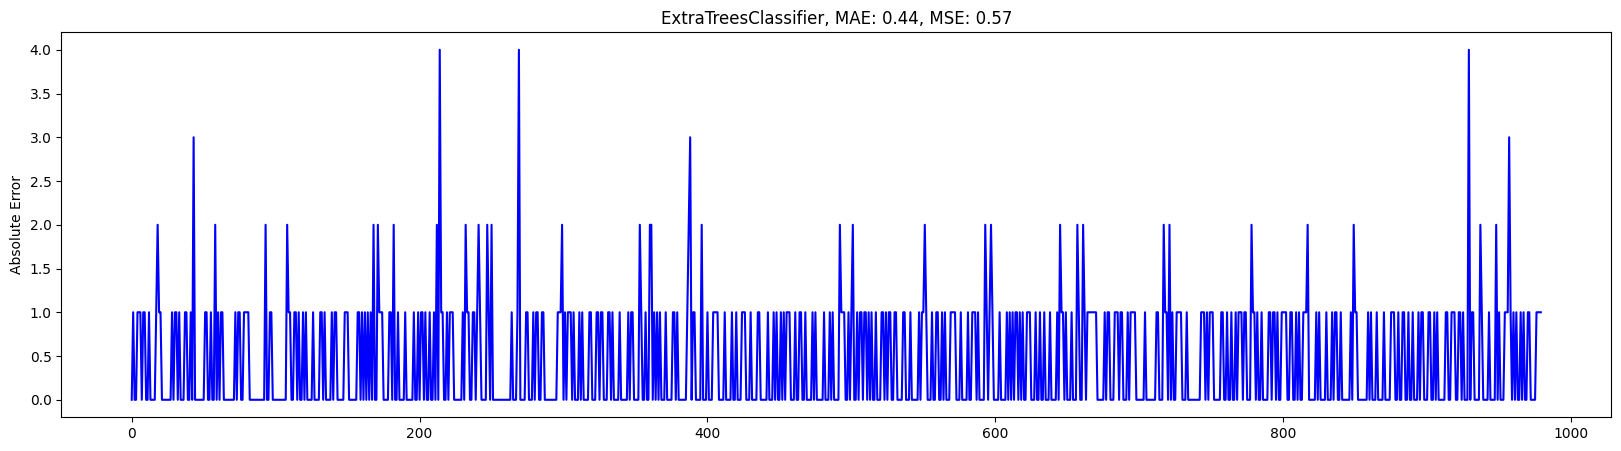

In [ ]:
# Creamos el contenedor para representar los resultados
fig, ax = plt.subplots(nrows = len(model_names), ncols = 1, figsize = (20, 5*len(model_names)))

# Representamos la matriz de confusión para cada modelo asignando los parámetros
for idx, model in enumerate(models_to_show):

  # En la variable(array) xx guarda los índices de las muestras del conjunto de datos de test
  xx = np.arange(len(ytest))
  ax_n=ax[idx%len(model_names)] if len(model_names) > 1 else ax
  ax_n.plot(xx, abs(ytest-model[3]), c='b', label='error')
  ax_n.set_ylabel("Absolute Error")
  ax_n.set_title(f'{model_names[idx]}, MAE: {str(round(np.mean(abs(ytest-model[3])),2))}, MSE: {str(round(np.mean(np.square(ytest-model[3])),2))}')